## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
### plt.draw
import geopandas
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Read Data

In [2]:
df = pd.read_csv("Food_Establishment_Inspection_Data.csv",low_memory=False )
zip_codes = pd.read_csv("US Zip Codes from 2013 Government Data.txt",dtype = str)

## Convert to Datetime

In [3]:
df["Inspection Date"] = pd.to_datetime(df["Inspection Date"])

In [21]:
df_no_date = df.drop(df[df["Inspection Date"].isna()].index)

df_no_date["year"] = df_no_date["Inspection Date"].dt.year.apply(lambda x:int(x))

## Filling missing values for Zip code

In [16]:
zip_codes.columns = ["Zip Code" , "Latitude" , "Longitude"]

In [17]:
zip_codes["Latitude"] = zip_codes["Latitude"].apply(lambda x:float(x))
zip_codes["Longitude"] = zip_codes["Longitude"].apply(lambda x:float(x))

In [18]:
zip_codes.index = zip_codes["Zip Code"]

In [20]:
missing_cords = df[df["Longitude"].isna()]

In [21]:
def zip_to_cord(zip_codes,x,latlong ):
    if x in zip_codes.index:
        if latlong == "lat" :
            return zip_codes.loc[x ,"Latitude"] 
        elif latlong == "long":
            return zip_codes.loc[x ,"Longitude"] 
    return None
df.loc[missing_cords.index , "Latitude"] = missing_cords["Zip Code"].apply(lambda x:zip_to_cord(zip_codes, x,"lat"))

In [22]:
df.loc[missing_cords.index , "Longitude"] = missing_cords["Zip Code"].apply(lambda x:zip_to_cord(zip_codes, x, "long"))

In [23]:
df.drop(df[df["Latitude"].isna()].index,inplace=True)

## Plotting

In [25]:
gp_by_year_bid = df_no_date.groupby(["year" , "Business_ID","Inspection_Serial_Num"],as_index=False).first().groupby(["year" , "Business_ID"]).mean()

In [27]:
gp_by_year_bid["Latitude"] = df_no_date.groupby(["year" , "Business_ID"]).first()["Latitude"]

In [28]:
gp_by_year_bid["Longitude"] = df_no_date.groupby(["year" , "Business_ID"]).first()["Longitude"]

In [29]:
gp_by_year_bid = gp_by_year_bid[["Inspection Score" , "Latitude" , "Longitude"]]

In [215]:
def plt_ins_score_per_year(year :int , df :pd.DataFrame ):
    fig, ax = plt.subplots(1,1)
    ax = sns.scatterplot(y= df.loc[year]["Latitude"] , x = df.loc[year]["Longitude"], hue =df.loc[year]["Inspection Score"] )
    plt.axis('off')
    ax.set_title(str(year))
    plt.show()

### Plot Average Inspection by each restaurant per year

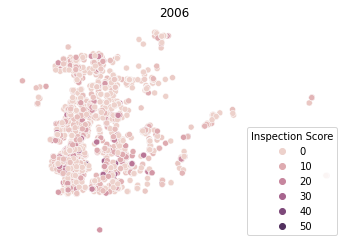

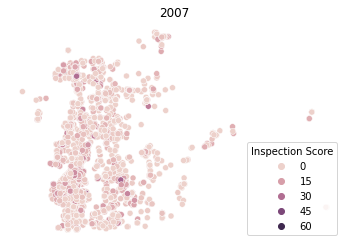

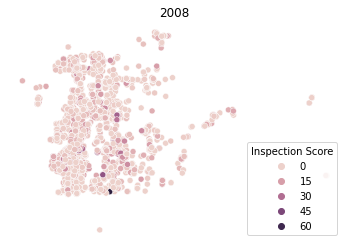

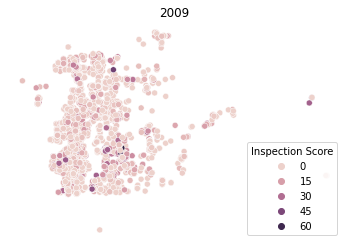

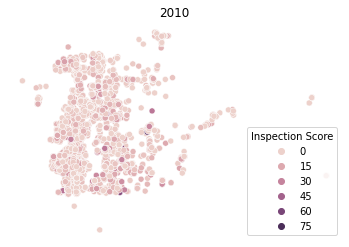

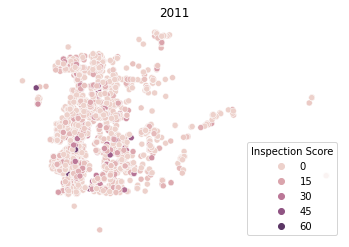

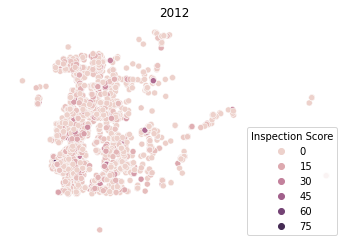

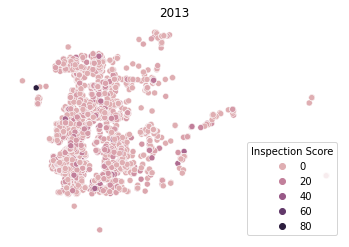

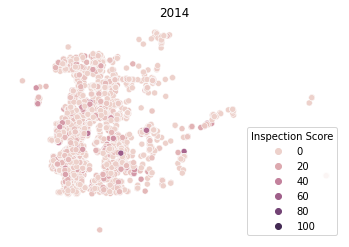

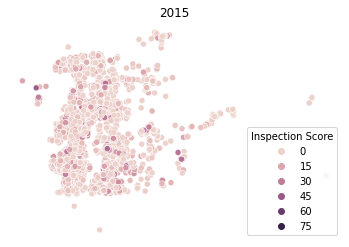

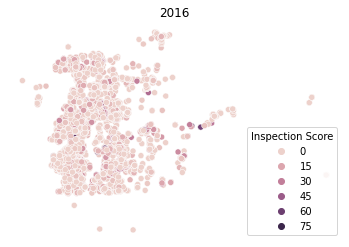

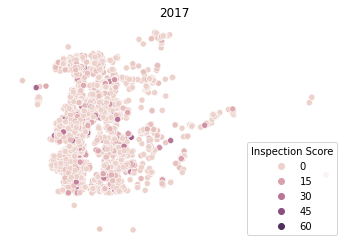

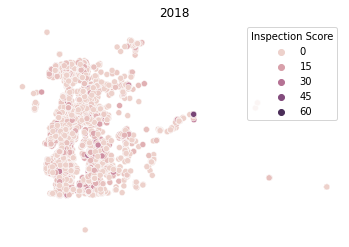

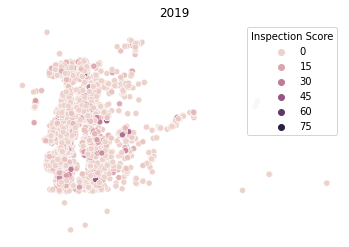

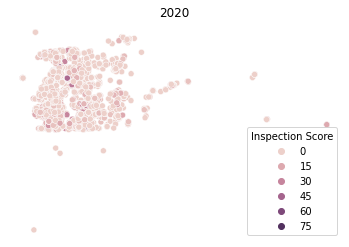

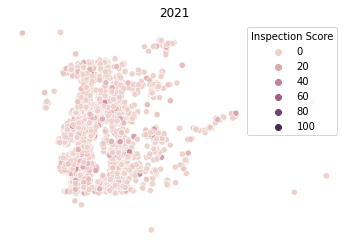

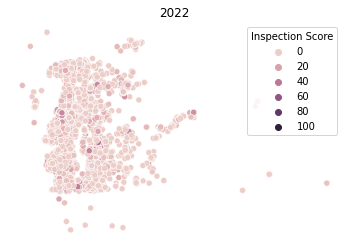

In [146]:
for year in range(2006,2023):

    plt_ins_score_per_year(year , gp_by_year_bid)

In [158]:
df["City"] = df["City"].apply(lambda x : x.lower().title() )

In [153]:
cities = df.City.unique()

In [156]:
list(map(lambda x : x.lower().title()    ,cities))

91

### Plot Average Incpection Scores for each province per Year

In [5]:
city = geopandas.read_file("WSDOT_-_City_Limits.shp")

In [223]:
ggg = geopandas.GeoDataFrame(df.groupby("Business_ID").first())

In [168]:
ddd =pd.merge(left=df.groupby("City",as_index=False).mean(), right= city , how = "inner" ,left_on= "City" ,right_on= "CityName").drop(["City","Violation Points","Grade"],axis=1)

In [171]:
ddd =geopandas.GeoDataFrame(ddd)

In [154]:
Cities = geopandas.read_file("WSDOT_-_City_Limits.shp")

In [36]:
df["year"] = df["Inspection Date"].dt.year

In [155]:
df_no_date = df.drop(df[df["Inspection Date"].isna()].index)
df_no_date["year"] = df_no_date["Inspection Date"].dt.year.apply(lambda x:int(x))

In [56]:
df_gp_year_ct = df_no_date.groupby(["year","City"],as_index= False).mean()

In [156]:
df_no_date["City"] = df_no_date["City"].apply(lambda x : x.lower().title() )

In [49]:
df_no_date.head(1)

Name Program Identifier Inspection Date  \
0  #807 TUTTA BELLA   #807 TUTTA BELLA      2022-08-31   

                        Description          Address     City Zip Code  \
0  Seating 0-12 - Risk Category III  2746 NE 45TH ST  Seattle    98105   

            Phone   Longitude   Latitude  ... Violation Type  \
0  (206) 722-6400 -122.296415  47.662311  ...           BLUE   

                               Violation Description  Violation Points  \
0  3200 - Insects, rodents, animals not present; ...                 5   

  Business_ID Inspection_Serial_Num Violation_Record_ID Grade  \
0   PR0089260             DAEEWQC0L           IVQ7QYW2V   1.0   

   Address_corrected   Name_Corrected  year  
0    2746 NE 45TH ST  807 TUTTA BELLA  2022  

[1 rows x 25 columns]

In [50]:
Cities.head(1)

OBJECTID   CityName CountySeat  CityGNISPl  LastUpdate CountyFIPS  \
0      8887  Centralia         no     2409429  2020-02-29      53041   

  MajorCity CityFIPSLo OFMCityCod                                GlobalID  \
0       yes    5311160       0180  {98E17EF8-61EB-413A-A6BE-7F0E1B63A972}   

     SHAPESTAre     SHAPESTLen  \
0  2.176093e+08  188059.322976   

                                            geometry  
0  POLYGON ((-13686157.608 5901325.120, -13686157...

In [62]:
df_plt_yr_ct = (pd.merge(left=df_gp_year_ct , right= Cities , left_on= "City" , right_on="CityName" , how = "inner" ))

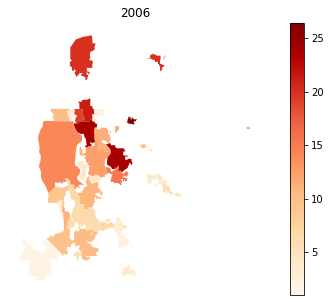

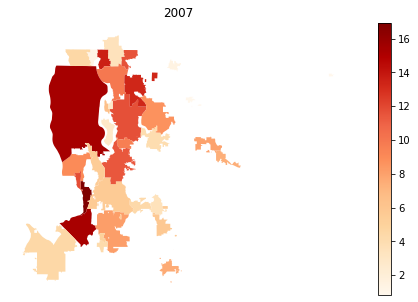

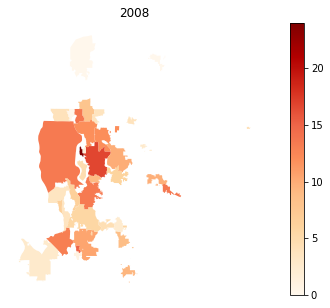

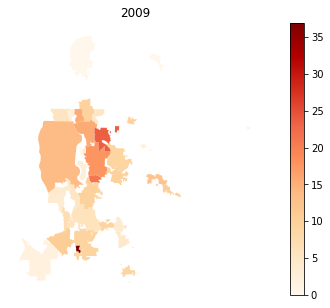

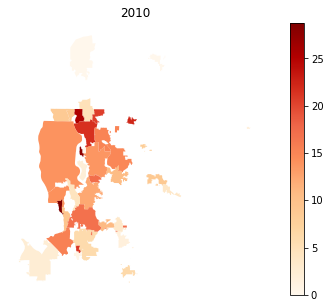

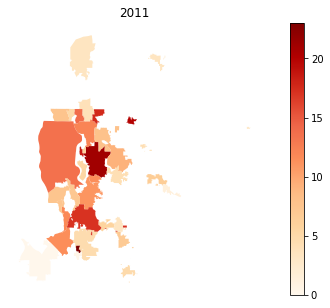

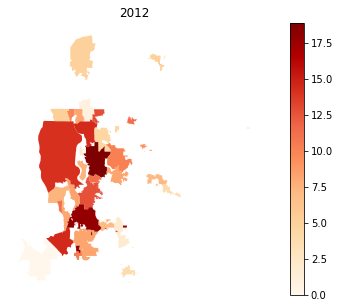

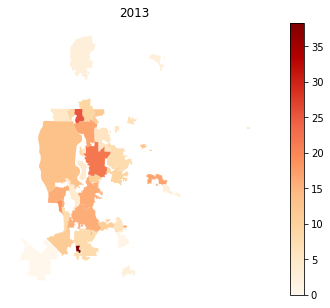

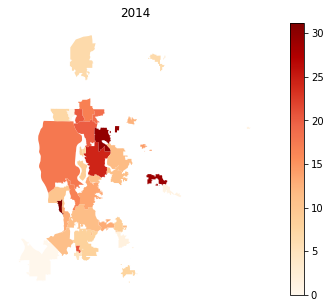

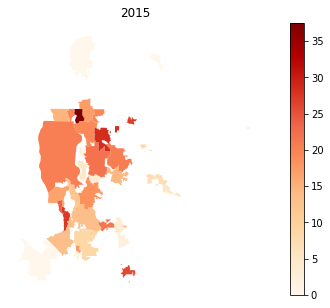

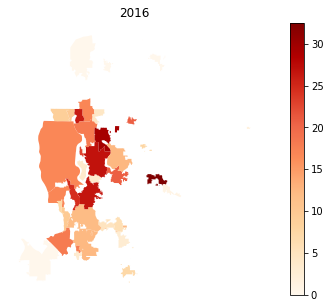

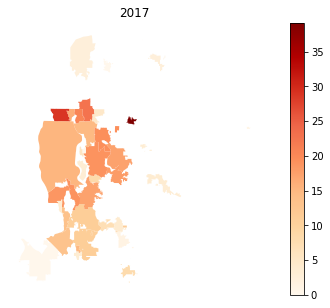

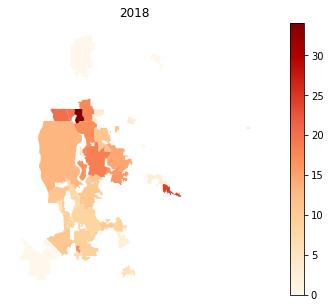

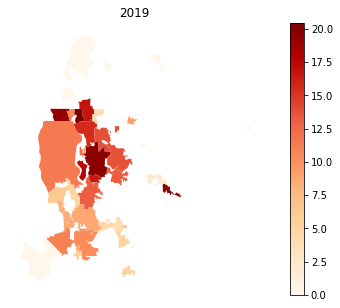

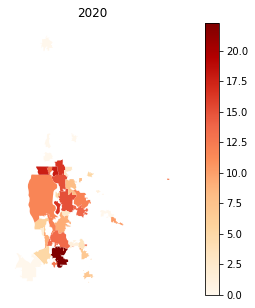

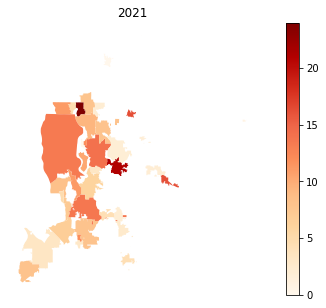

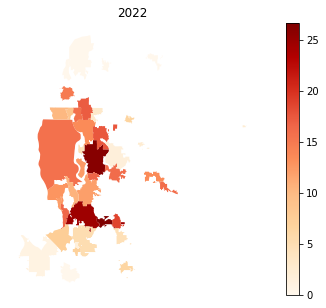

In [76]:
years = df_plt_yr_ct["year"].unique()
for year in years:
    ggg = geopandas.GeoDataFrame(df_plt_yr_ct[df_plt_yr_ct["year"] == year])
    ggg.plot(column  ="Inspection Score",legend=True, cmap='OrRd',figsize = (10,5)b)
    plt.axis("off")
    plt.title(year)
    plt.show()

### Analyze Seasonal Effect

In [67]:
ggg = geopandas.GeoDataFrame(df_plt_yr_ct[df_plt_yr_ct["year"] == 2006])
ggg.plot(column  ="Inspection Score")

In [157]:
df_no_date["month"] = df_no_date["Inspection Date"].dt.month
df_no_date["day"] = df_no_date["Inspection Date"].dt.day

In [158]:
def create_season(month:int , day:int) -> str :
    if month in []:
        return "Winter"
    elif month in []:
        return "Spring"
    elif month in [] :
        return "Summer"
    else:
        return "Autumn"

In [159]:
def seasons(m:int , d:int)-> str:
    season=None
    if (3==m and d>=21) or m==4 or m==5 or (m==6 and 20<=d):
        season = 'Spring'
    elif (6==m and d>=21 ) or m==7 or m==8 or (m==9 and 20<=d):
        season = 'Summer'
    elif (9==m and d>=21 ) or m==10 or m==11 or (m==12 and 20<=d):
        season = 'Autumn'
    elif (12==m and d>=21 ) or m==1 or m==2 or (m==3 and 20<=d):
        season = 'Winter'
    return season

In [160]:
df_no_date["season"] = df_no_date.apply(lambda x: seasons(x.month , x.day) , axis=1)

In [161]:
ddd = df_no_date.groupby(["year","season"] ,as_index=False).mean()

In [103]:
fig , ax = plt.subplots(1,1)

ax = sns.barplot(data= ddd , hue = "year" , y = "Inspection Score" , x = "season")
plt.draw()

ax.set_xticks(range(len(ax.get_xticks())));
ax.set_xticklabels(ax.get_xticklabels()); # , rotation = 90 
plt.legend(loc = (1,0),title = "year")
plt.title("Effect of season")
# plt.savefig("result_vs_score.jpeg" , bbox_inches = "tight")

Text(0.5, 1.0, 'Effect of season')

In [106]:
fig , ax = plt.subplots(1,1,figsize = (10,5))

ax = sns.barplot(data= ddd , x = "year" , y = "Inspection Score" , hue = "season")
plt.draw()

ax.set_xticks(range(len(ax.get_xticks())));
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90 ); # 
plt.legend(loc = (1,0),title = "year")
plt.title("Effect of season")

Text(0.5, 1.0, 'Effect of season')

### Analyze Number of Inspections/ Number of Restaurants proportion for province per year

In [162]:
temp = df_no_date.groupby(["year","City" ]).nunique()["Inspection_Serial_Num"] # Inspection_Serial_Num

In [164]:
temp = temp.reset_index()

In [125]:
temp

year           City  Inspection_Serial_Num
0    2006         Auburn                    251
1    2006       Bellevue                    423
2    2006  Black Diamond                      7
3    2006        Bothell                     68
4    2006         Burien                     85
..    ...            ...                    ...
769  2022        Tukwila                    324
770  2022         Vashon                      4
771  2022  Vashon Island                     53
772  2022   West Seattle                      1
773  2022    Woodinville                    269

[774 rows x 3 columns]

In [127]:
df_plt = (pd.merge(left=temp , right= Cities , left_on= "City" , right_on="CityName" , how = "inner" ))

In [165]:
temp1 = df_no_date.groupby(["year" , "City" ]).nunique()["Business_ID"].reset_index()

In [166]:
temp2 = temp

In [167]:
temp1.head()

year           City  Business_ID
0  2006         Auburn          105
1  2006       Bellevue          174
2  2006  Black Diamond            4
3  2006        Bothell           33
4  2006         Burien           37

In [197]:
temp2.head()

year           City  Inspection_Serial_Num
0  2006         Auburn                    251
1  2006       Bellevue                    423
2  2006  Black Diamond                      7
3  2006        Bothell                     68
4  2006         Burien                     85

In [196]:
temp1

year           City  Business_ID
0    2006         Auburn          105
1    2006       Bellevue          174
2    2006  Black Diamond            4
3    2006        Bothell           33
4    2006         Burien           37
..    ...            ...          ...
769  2022        Tukwila          264
770  2022         Vashon            4
771  2022  Vashon Island           46
772  2022   West Seattle            1
773  2022    Woodinville          254

[774 rows x 3 columns]

In [198]:
temp3 = pd.merge(temp1 , temp2 , on = ["year" , "City"] , how = "inner")

In [200]:
temp3["proportion"] = temp3.apply(lambda x:x["Inspection_Serial_Num"] / x["Business_ID"],axis=1)

In [202]:
temp3 = (pd.merge(left=temp3 , right= Cities , left_on= "City" , right_on="CityName" , how = "inner" ))

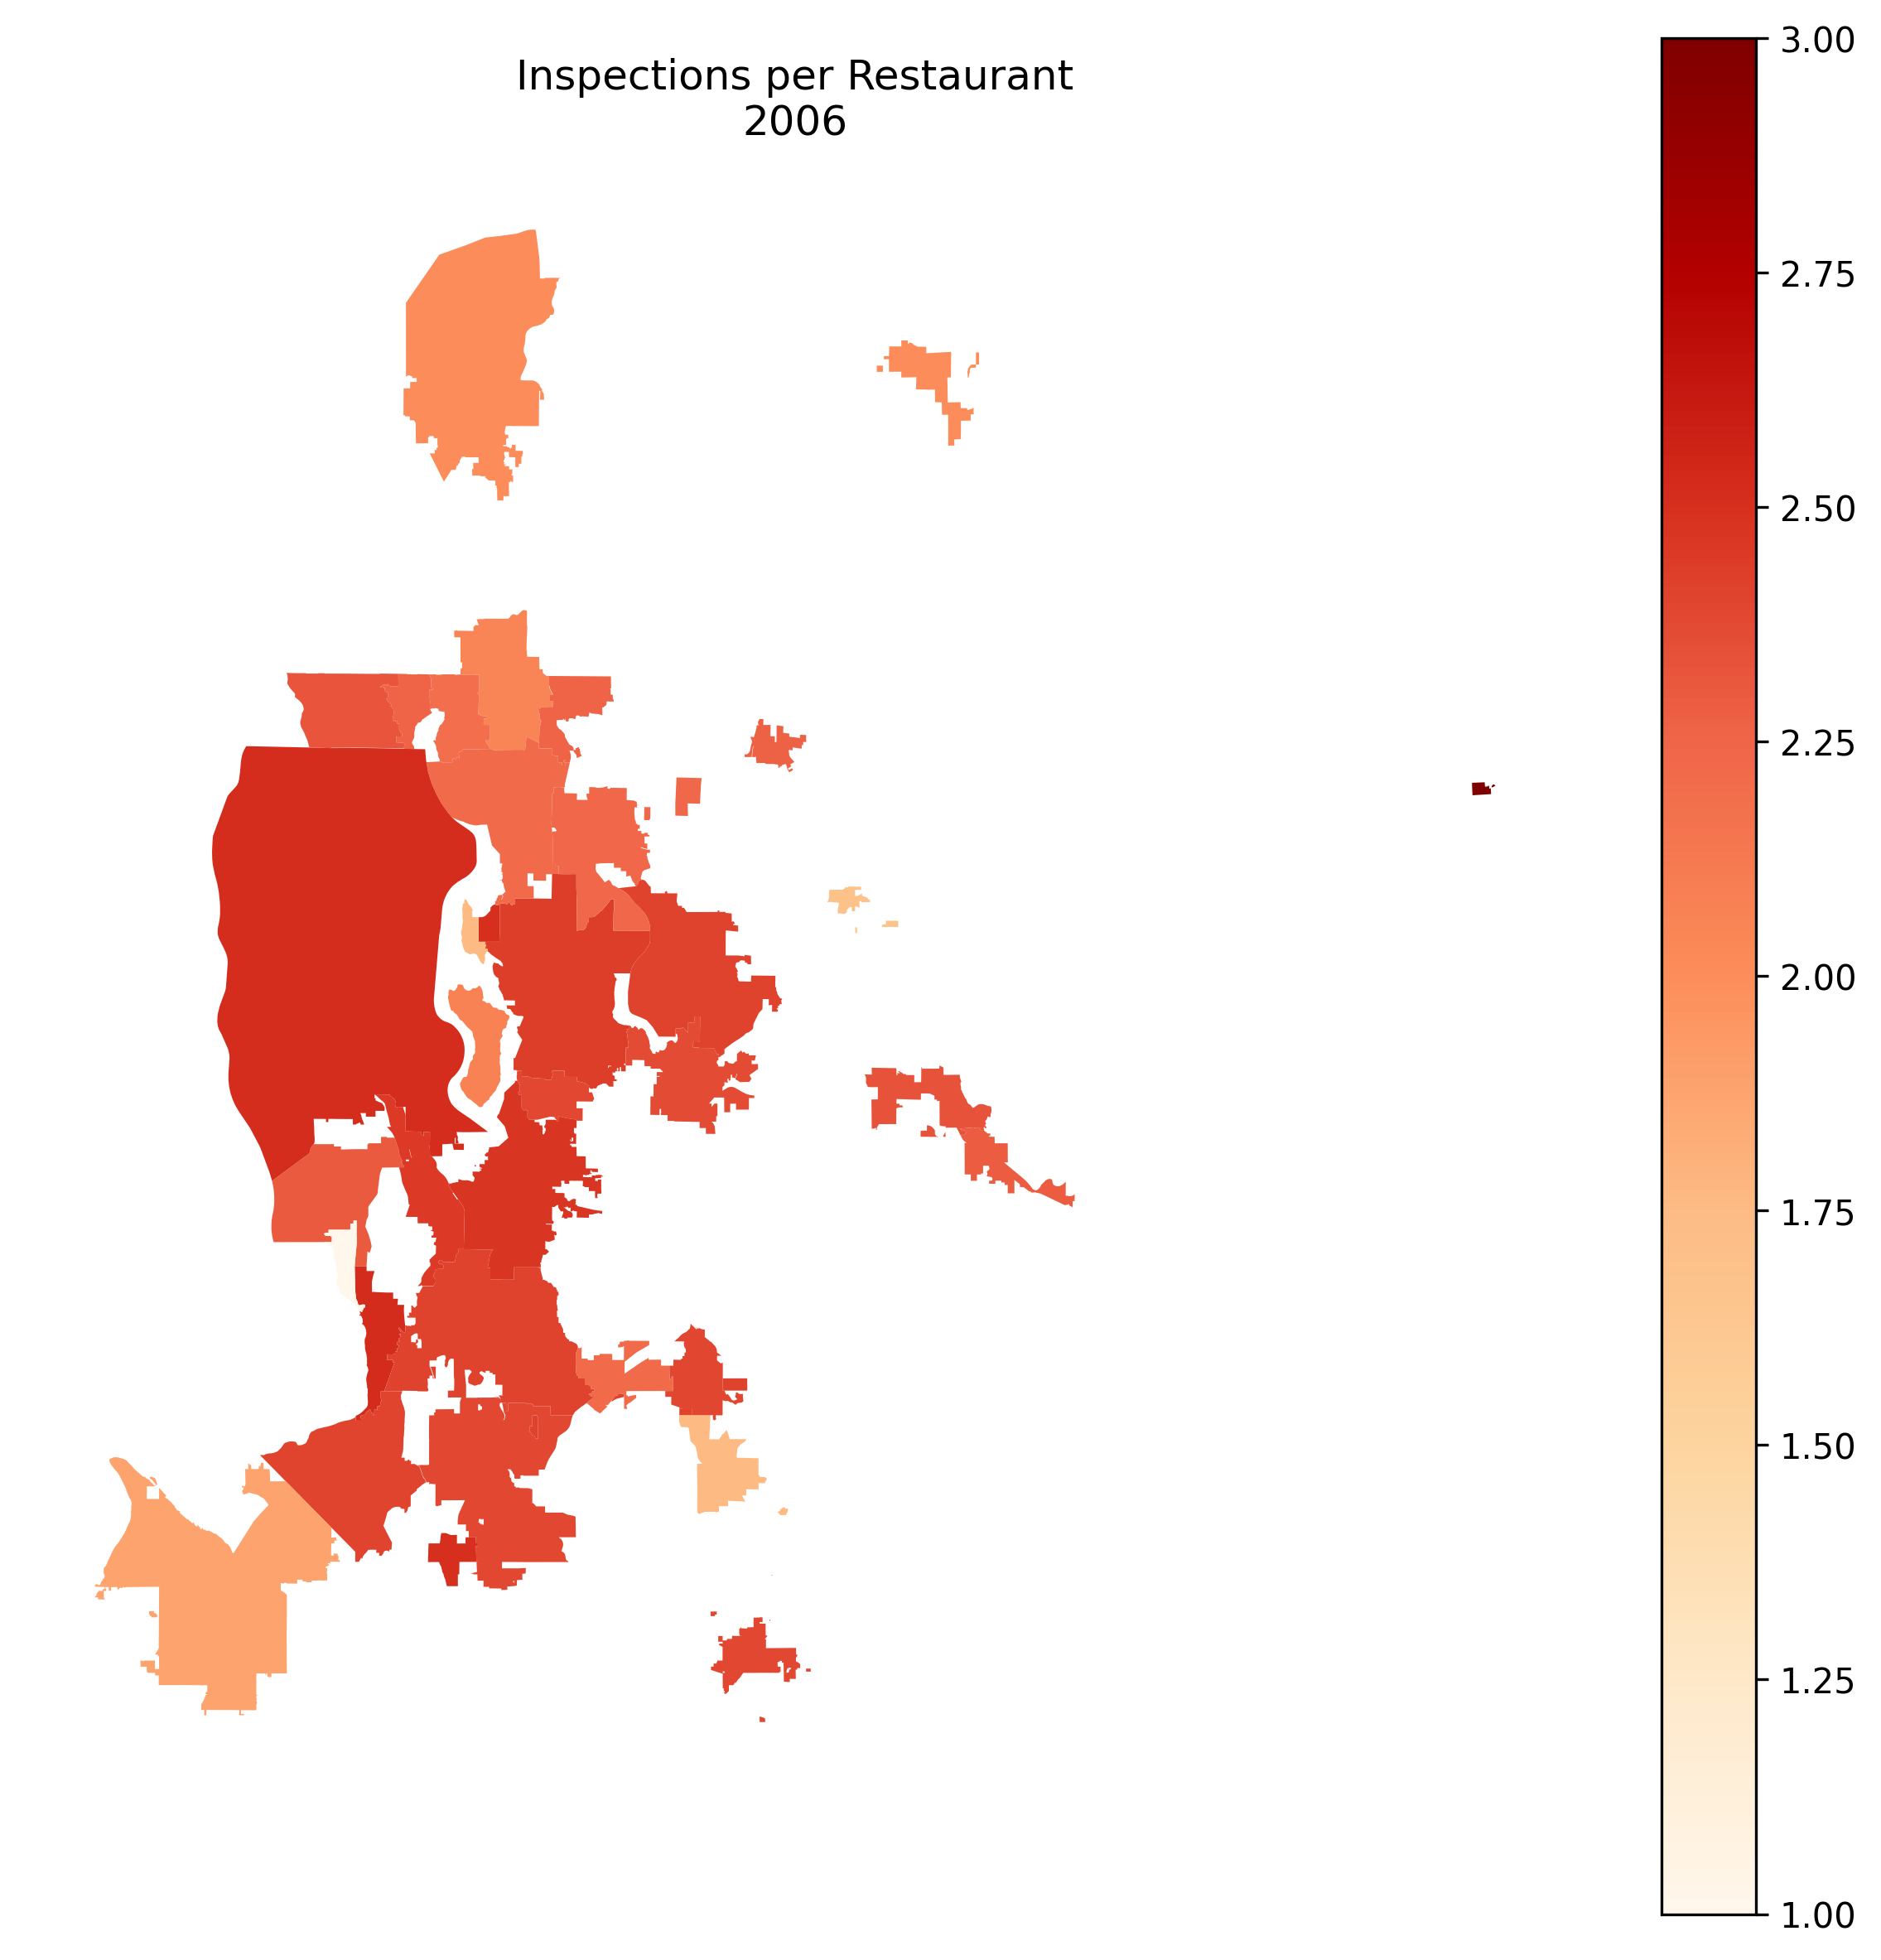

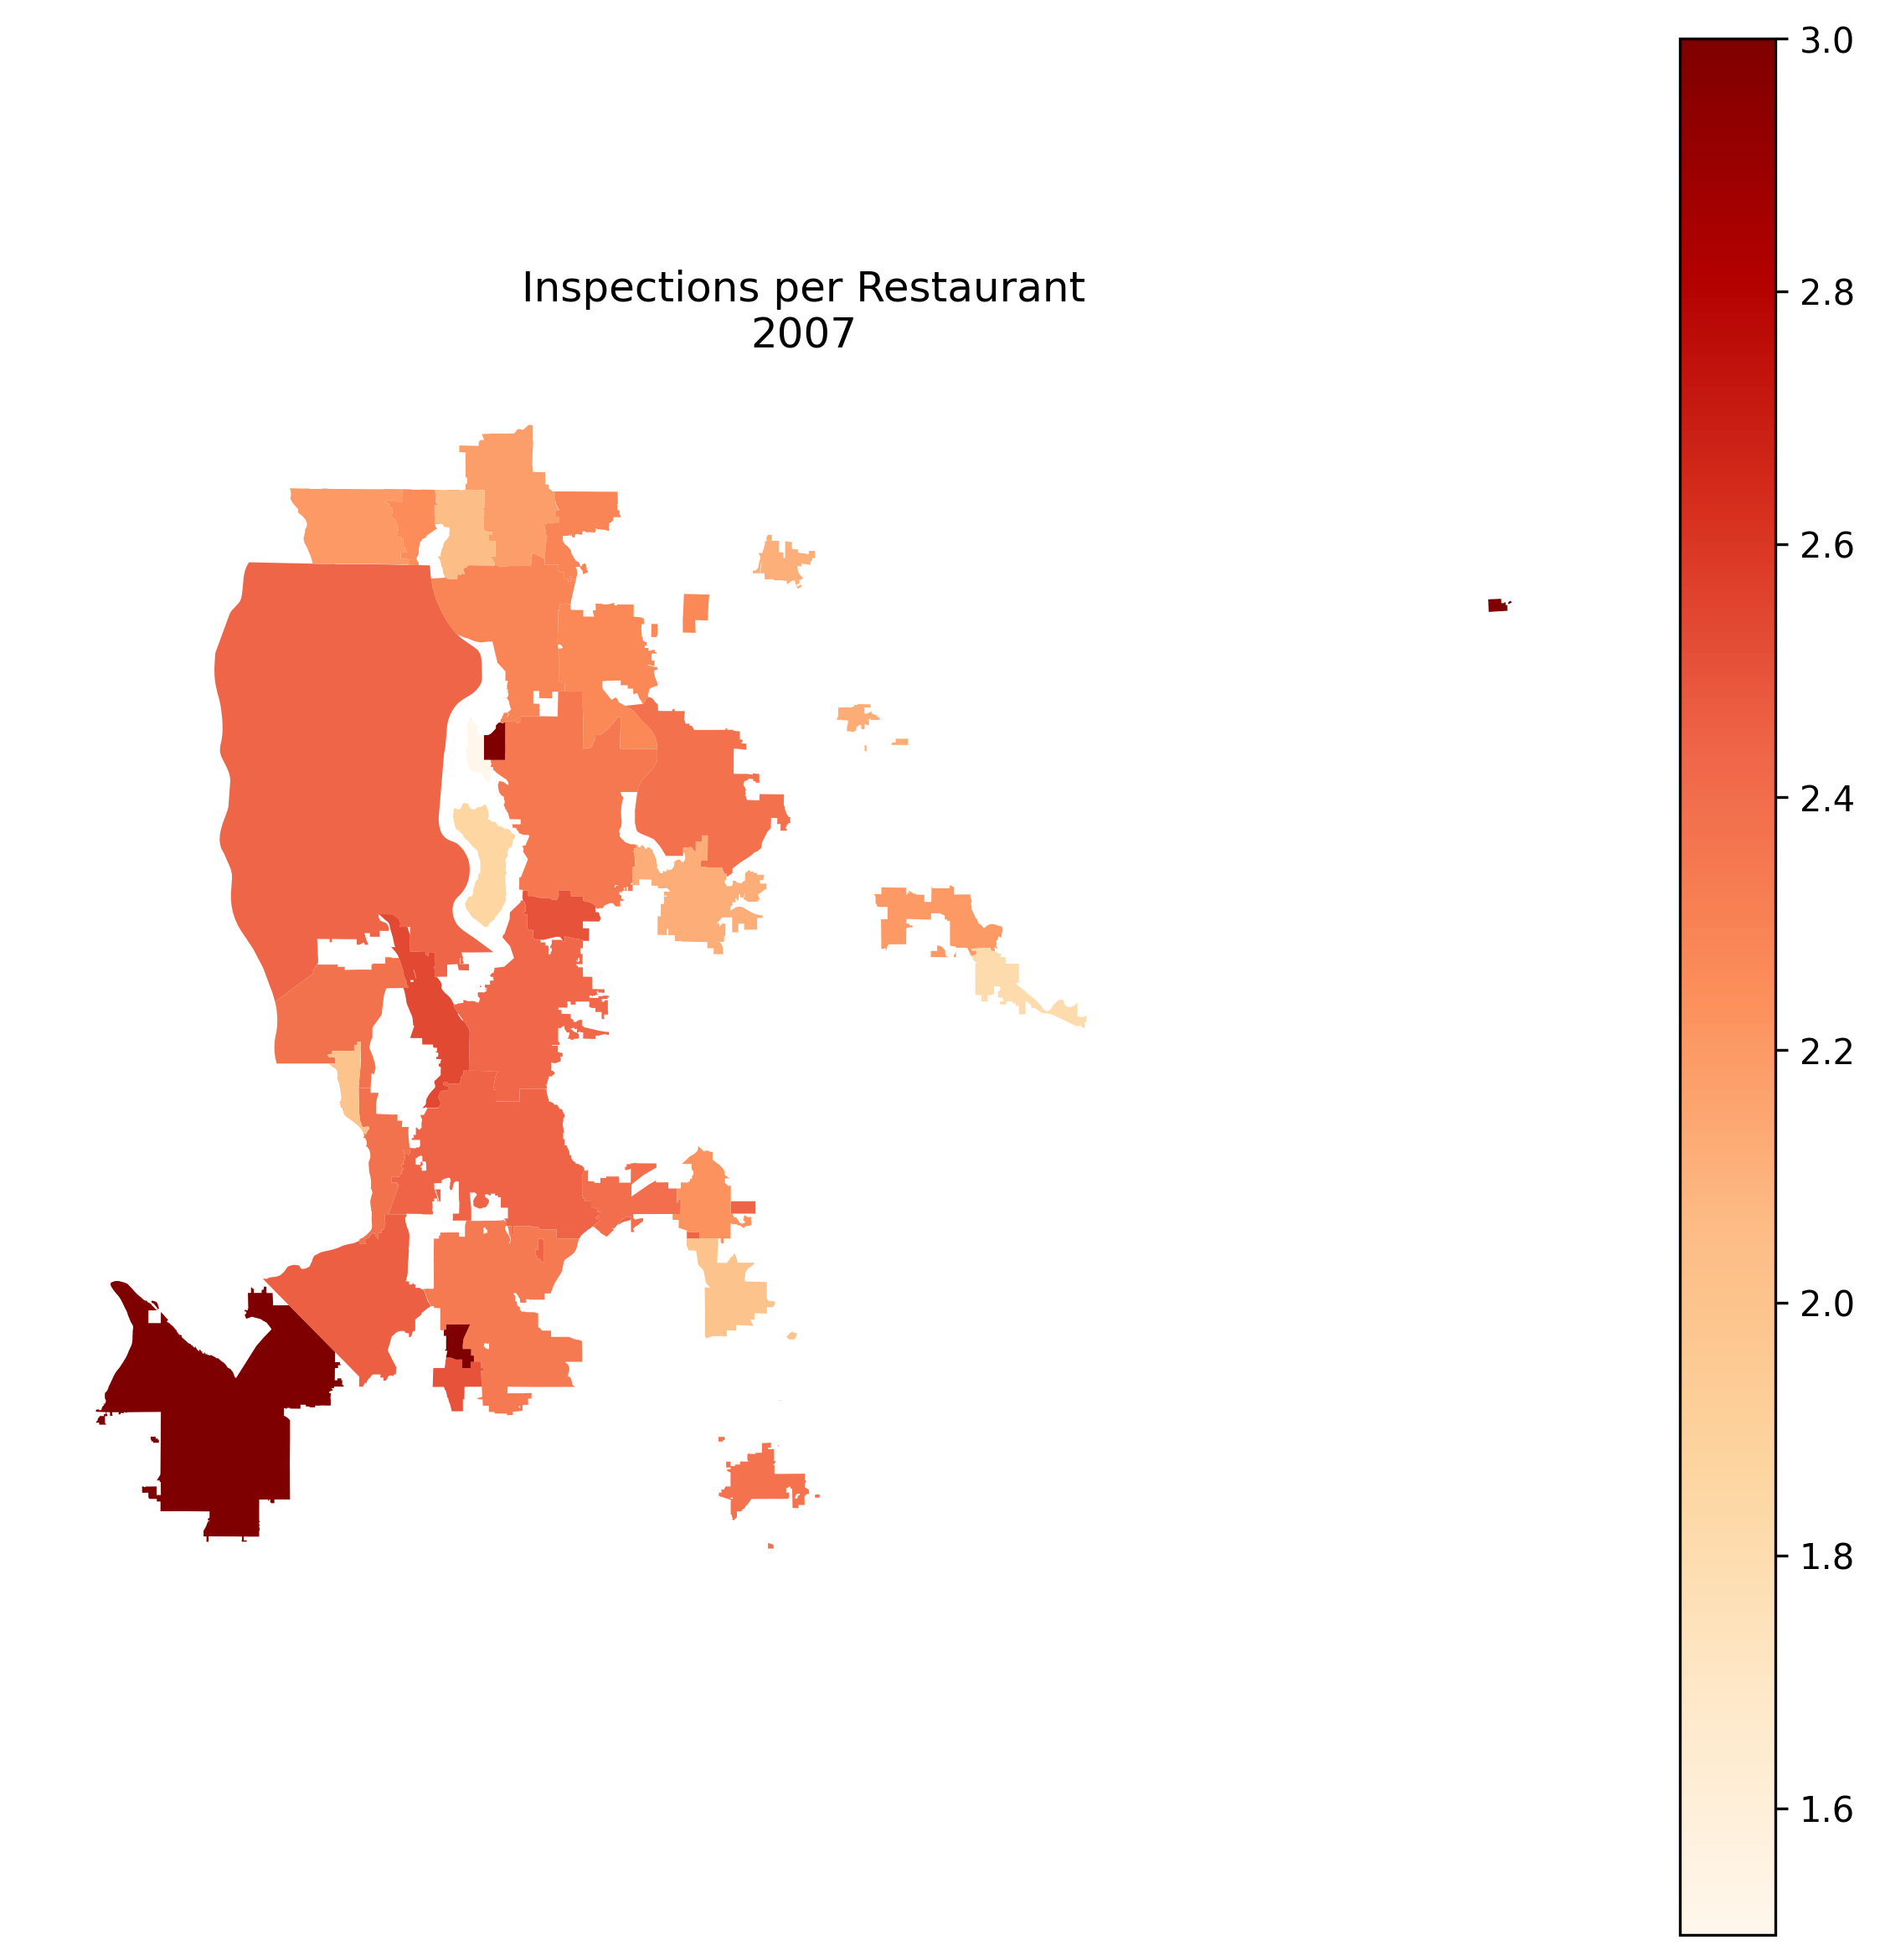

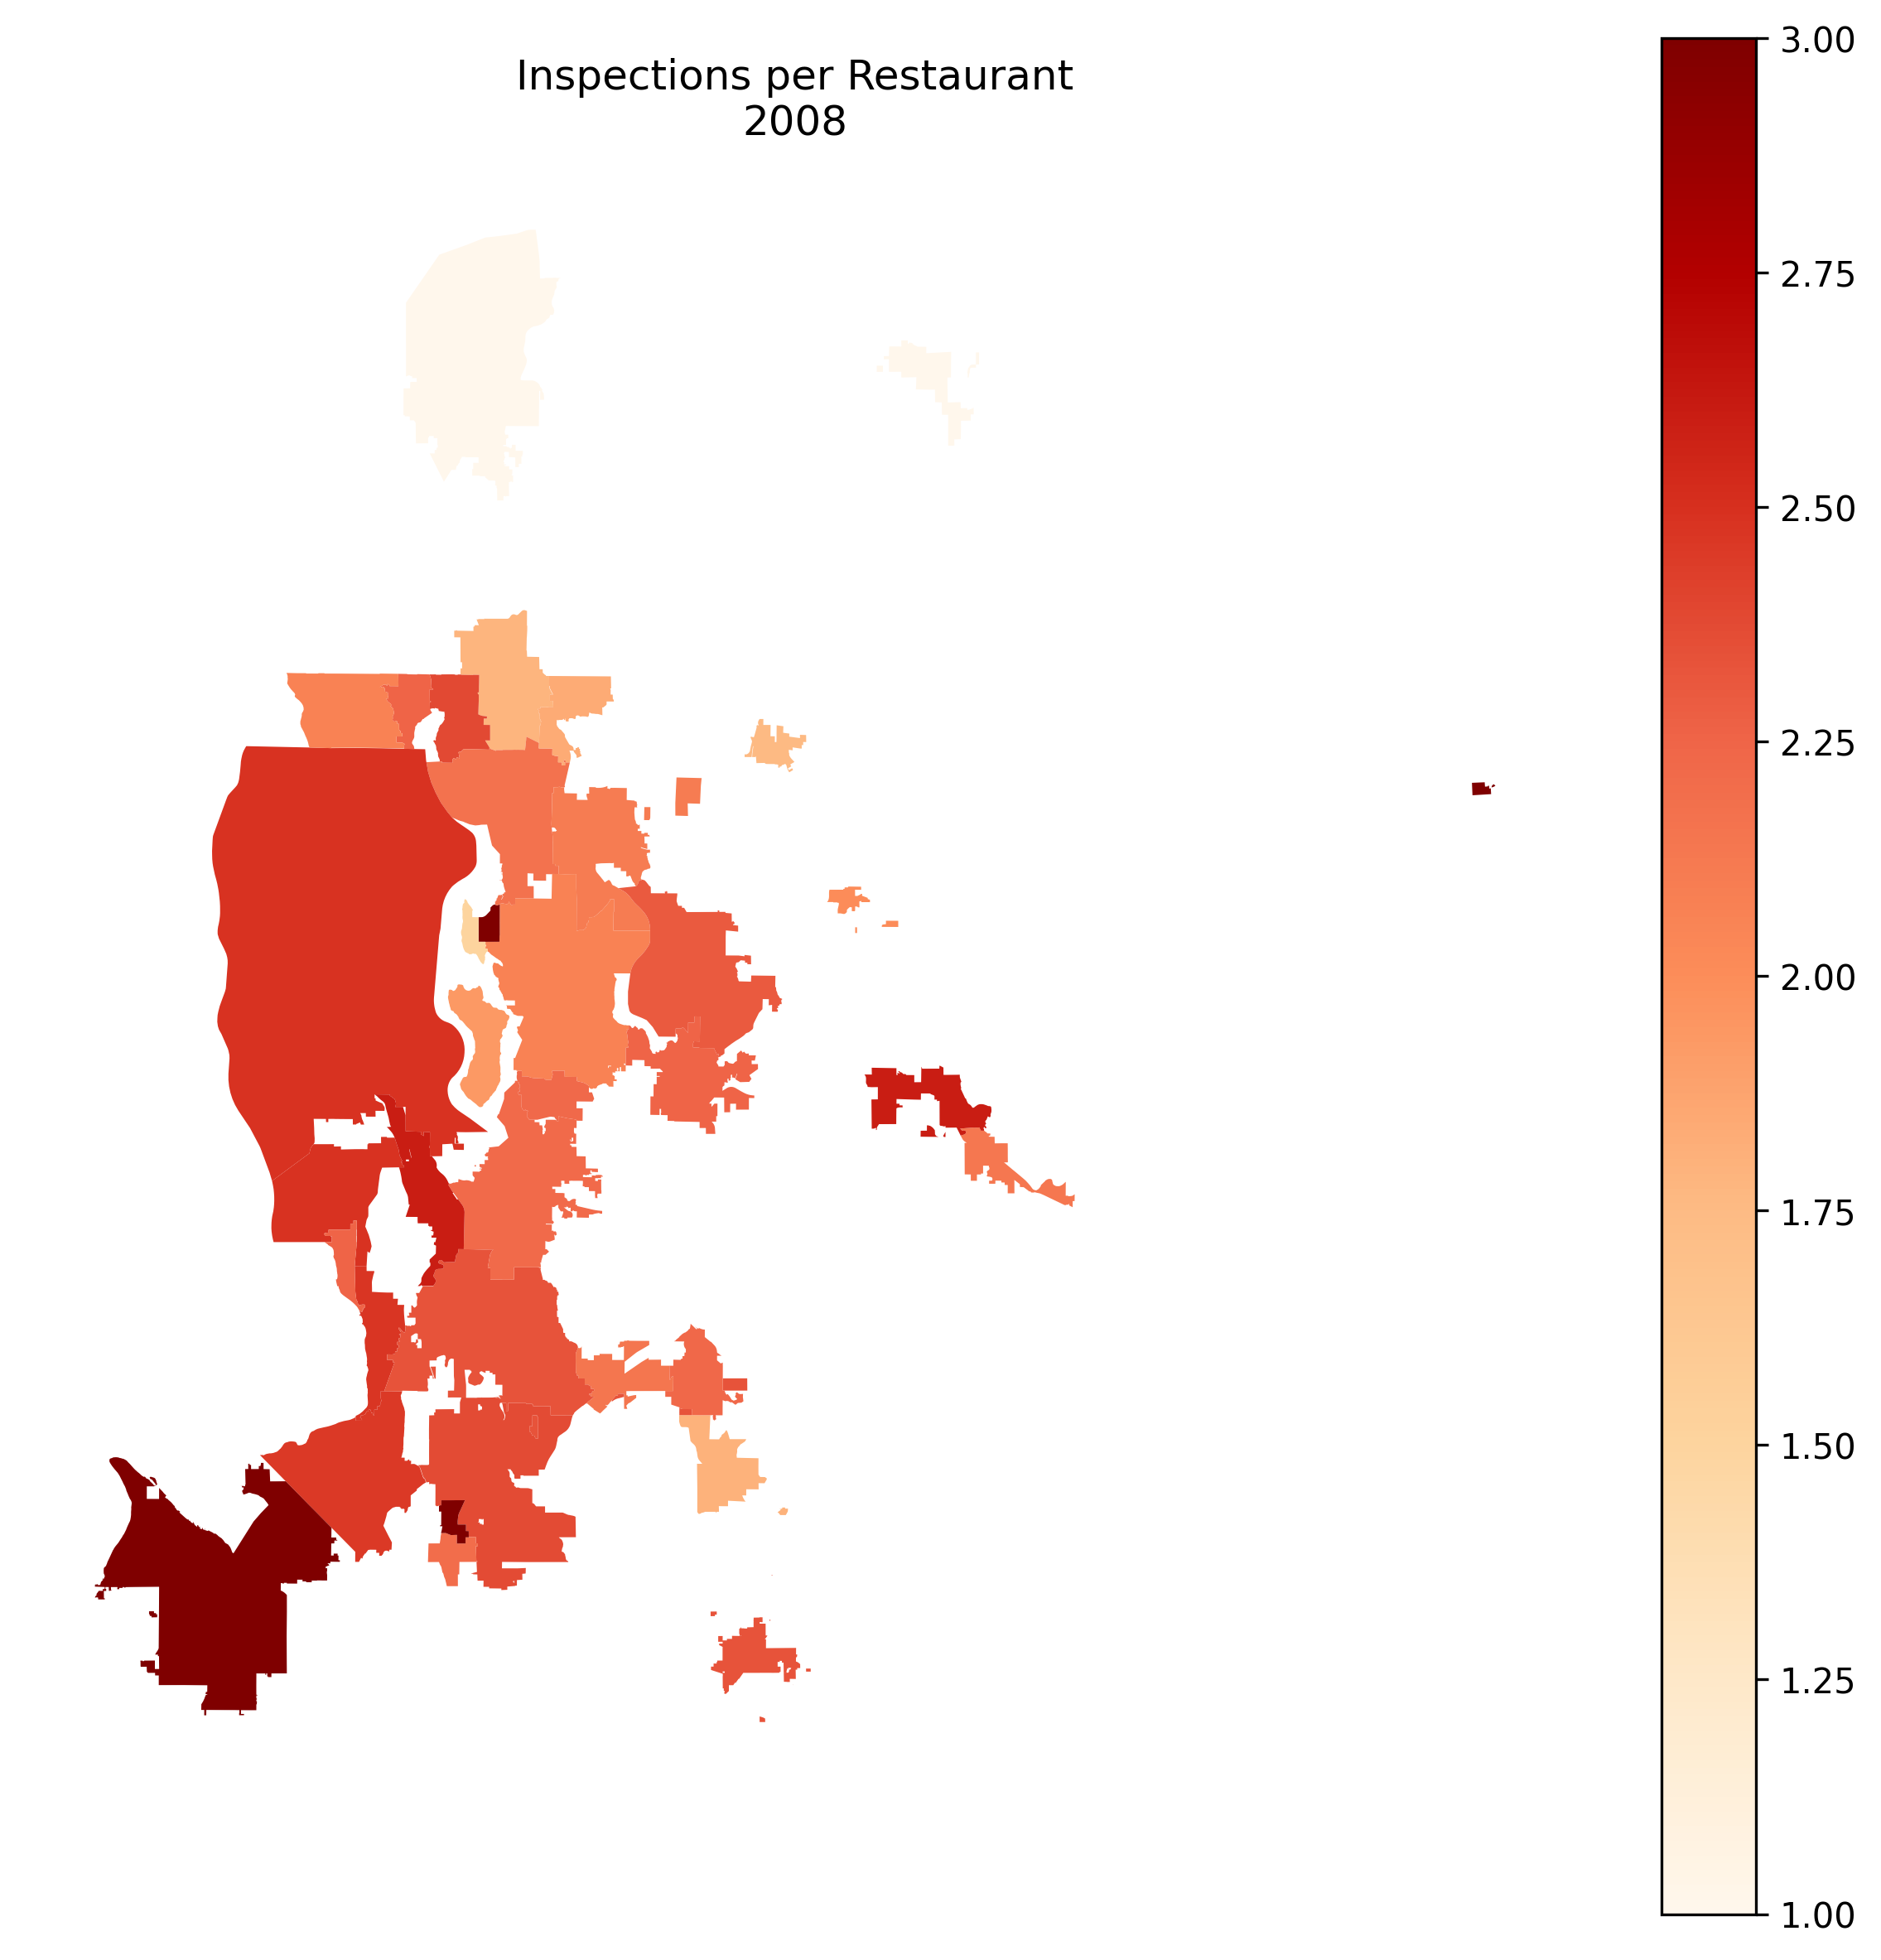

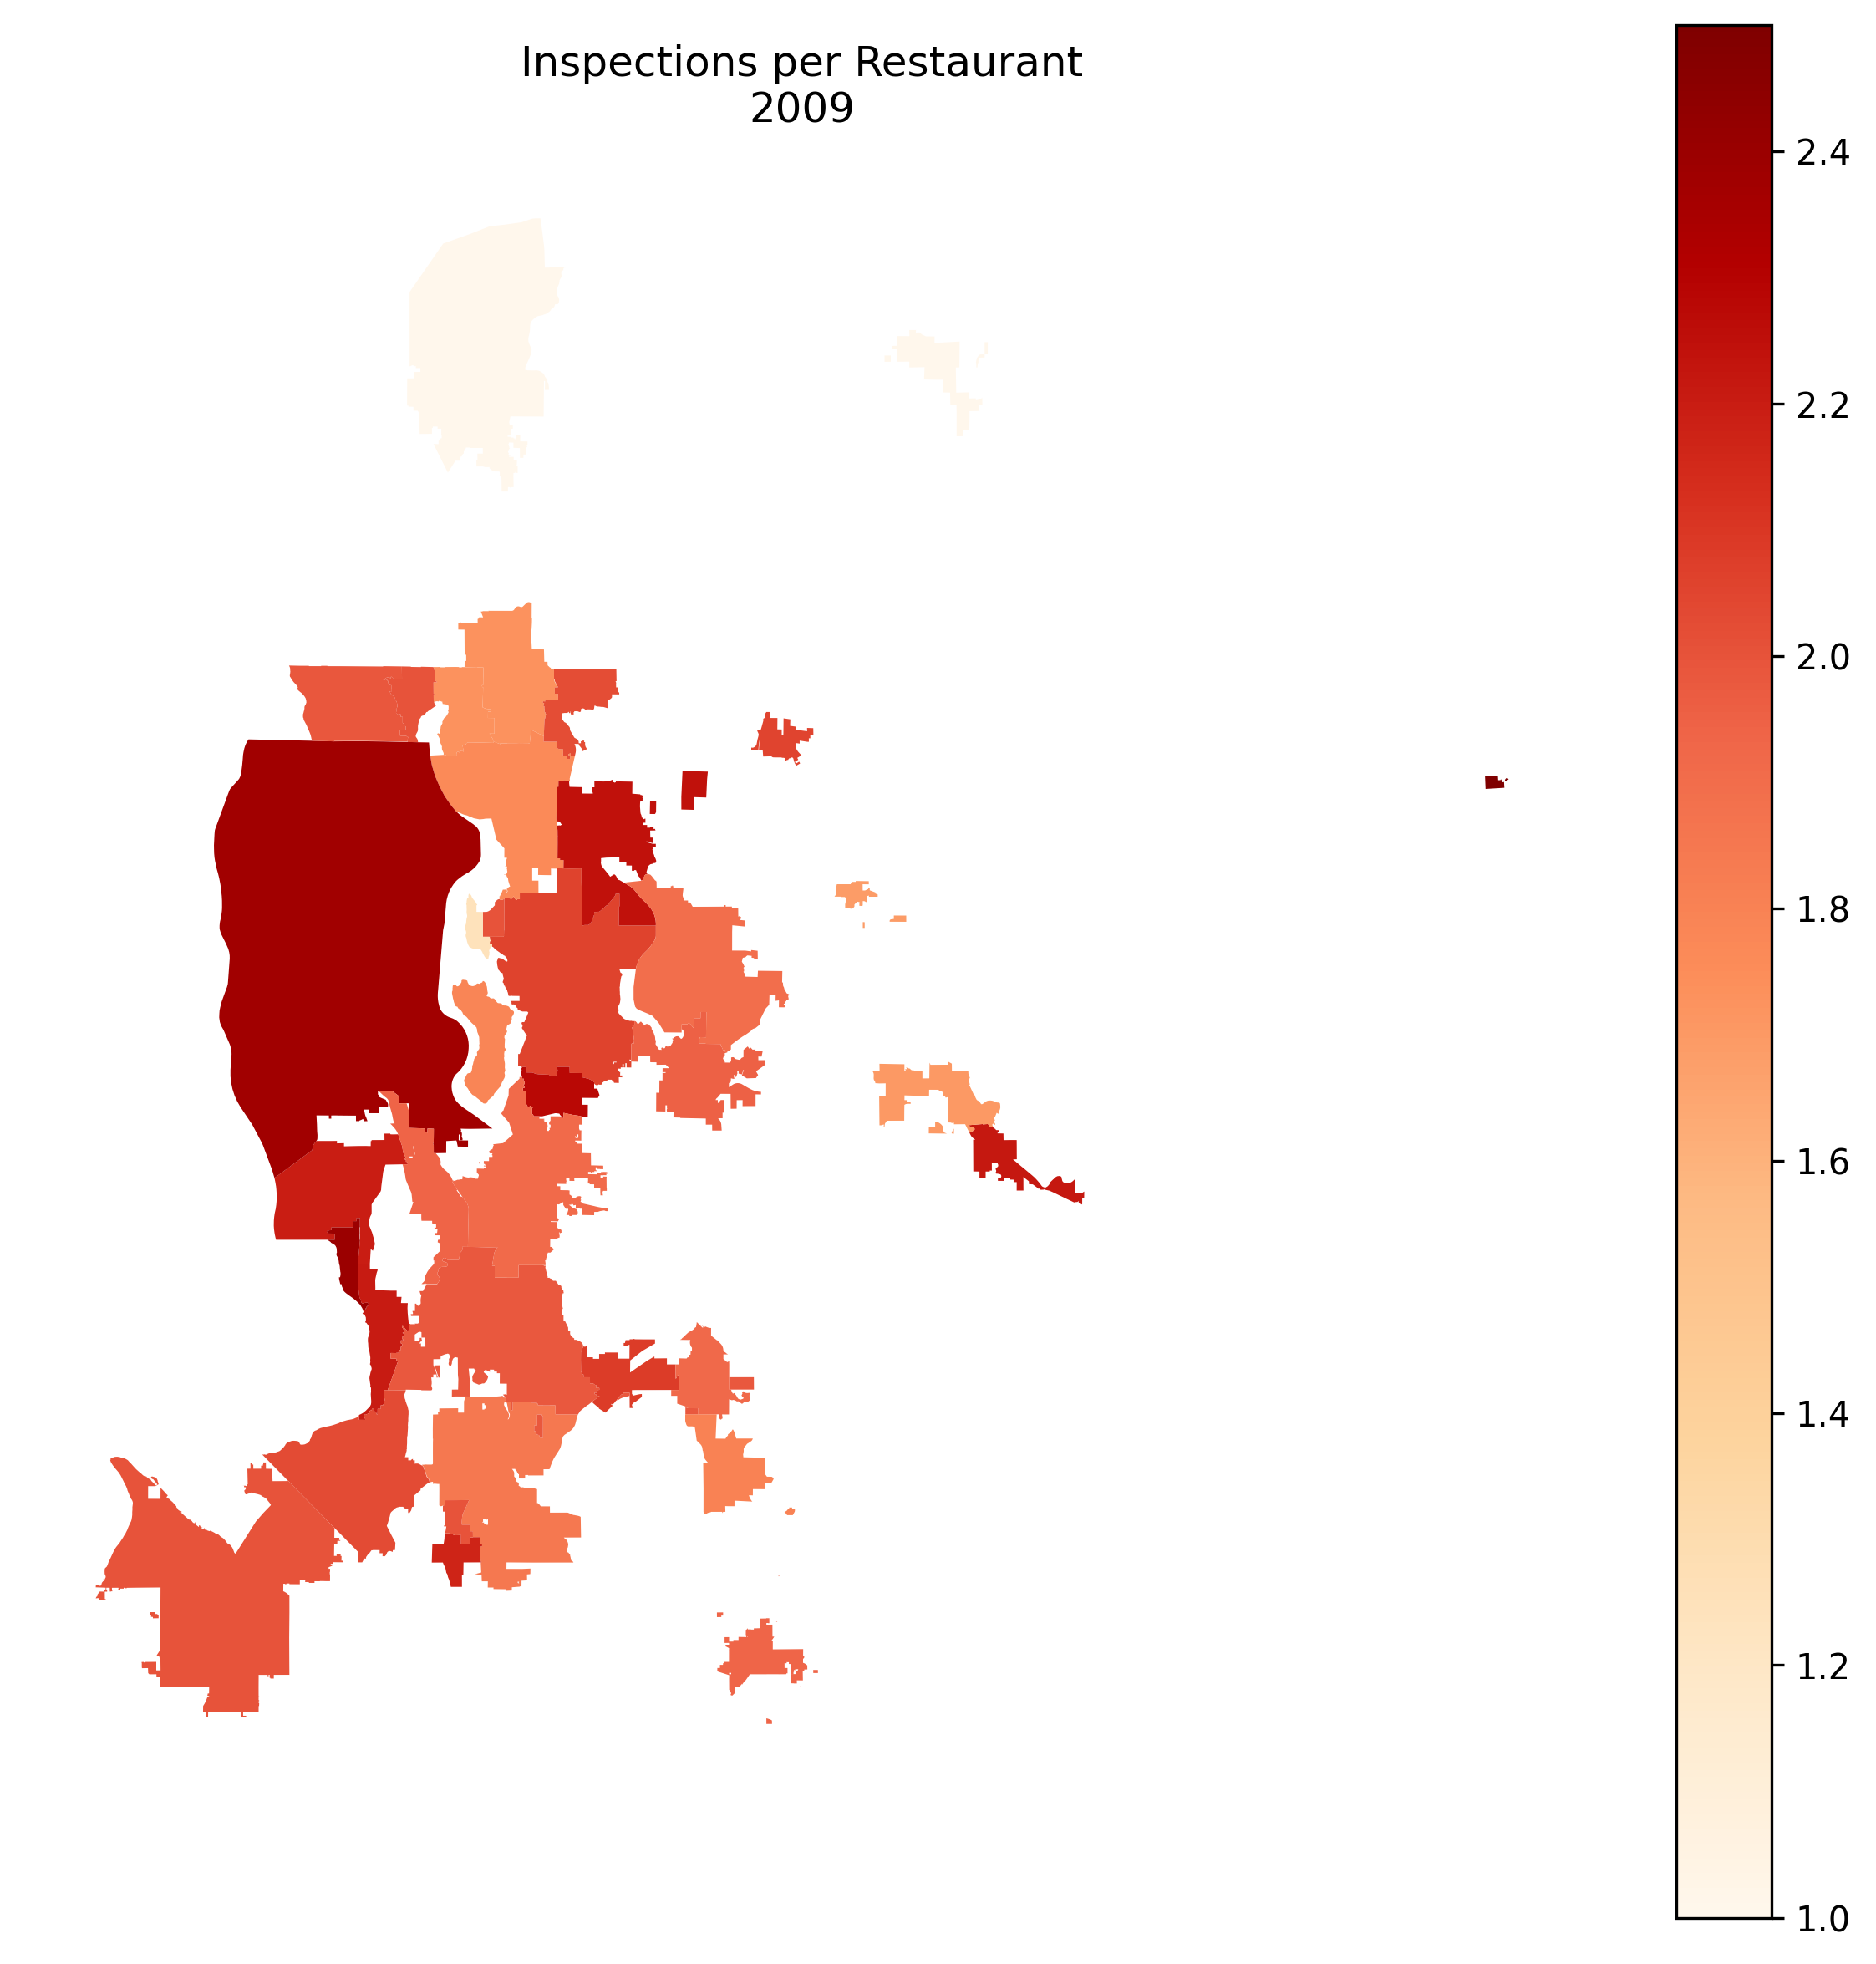

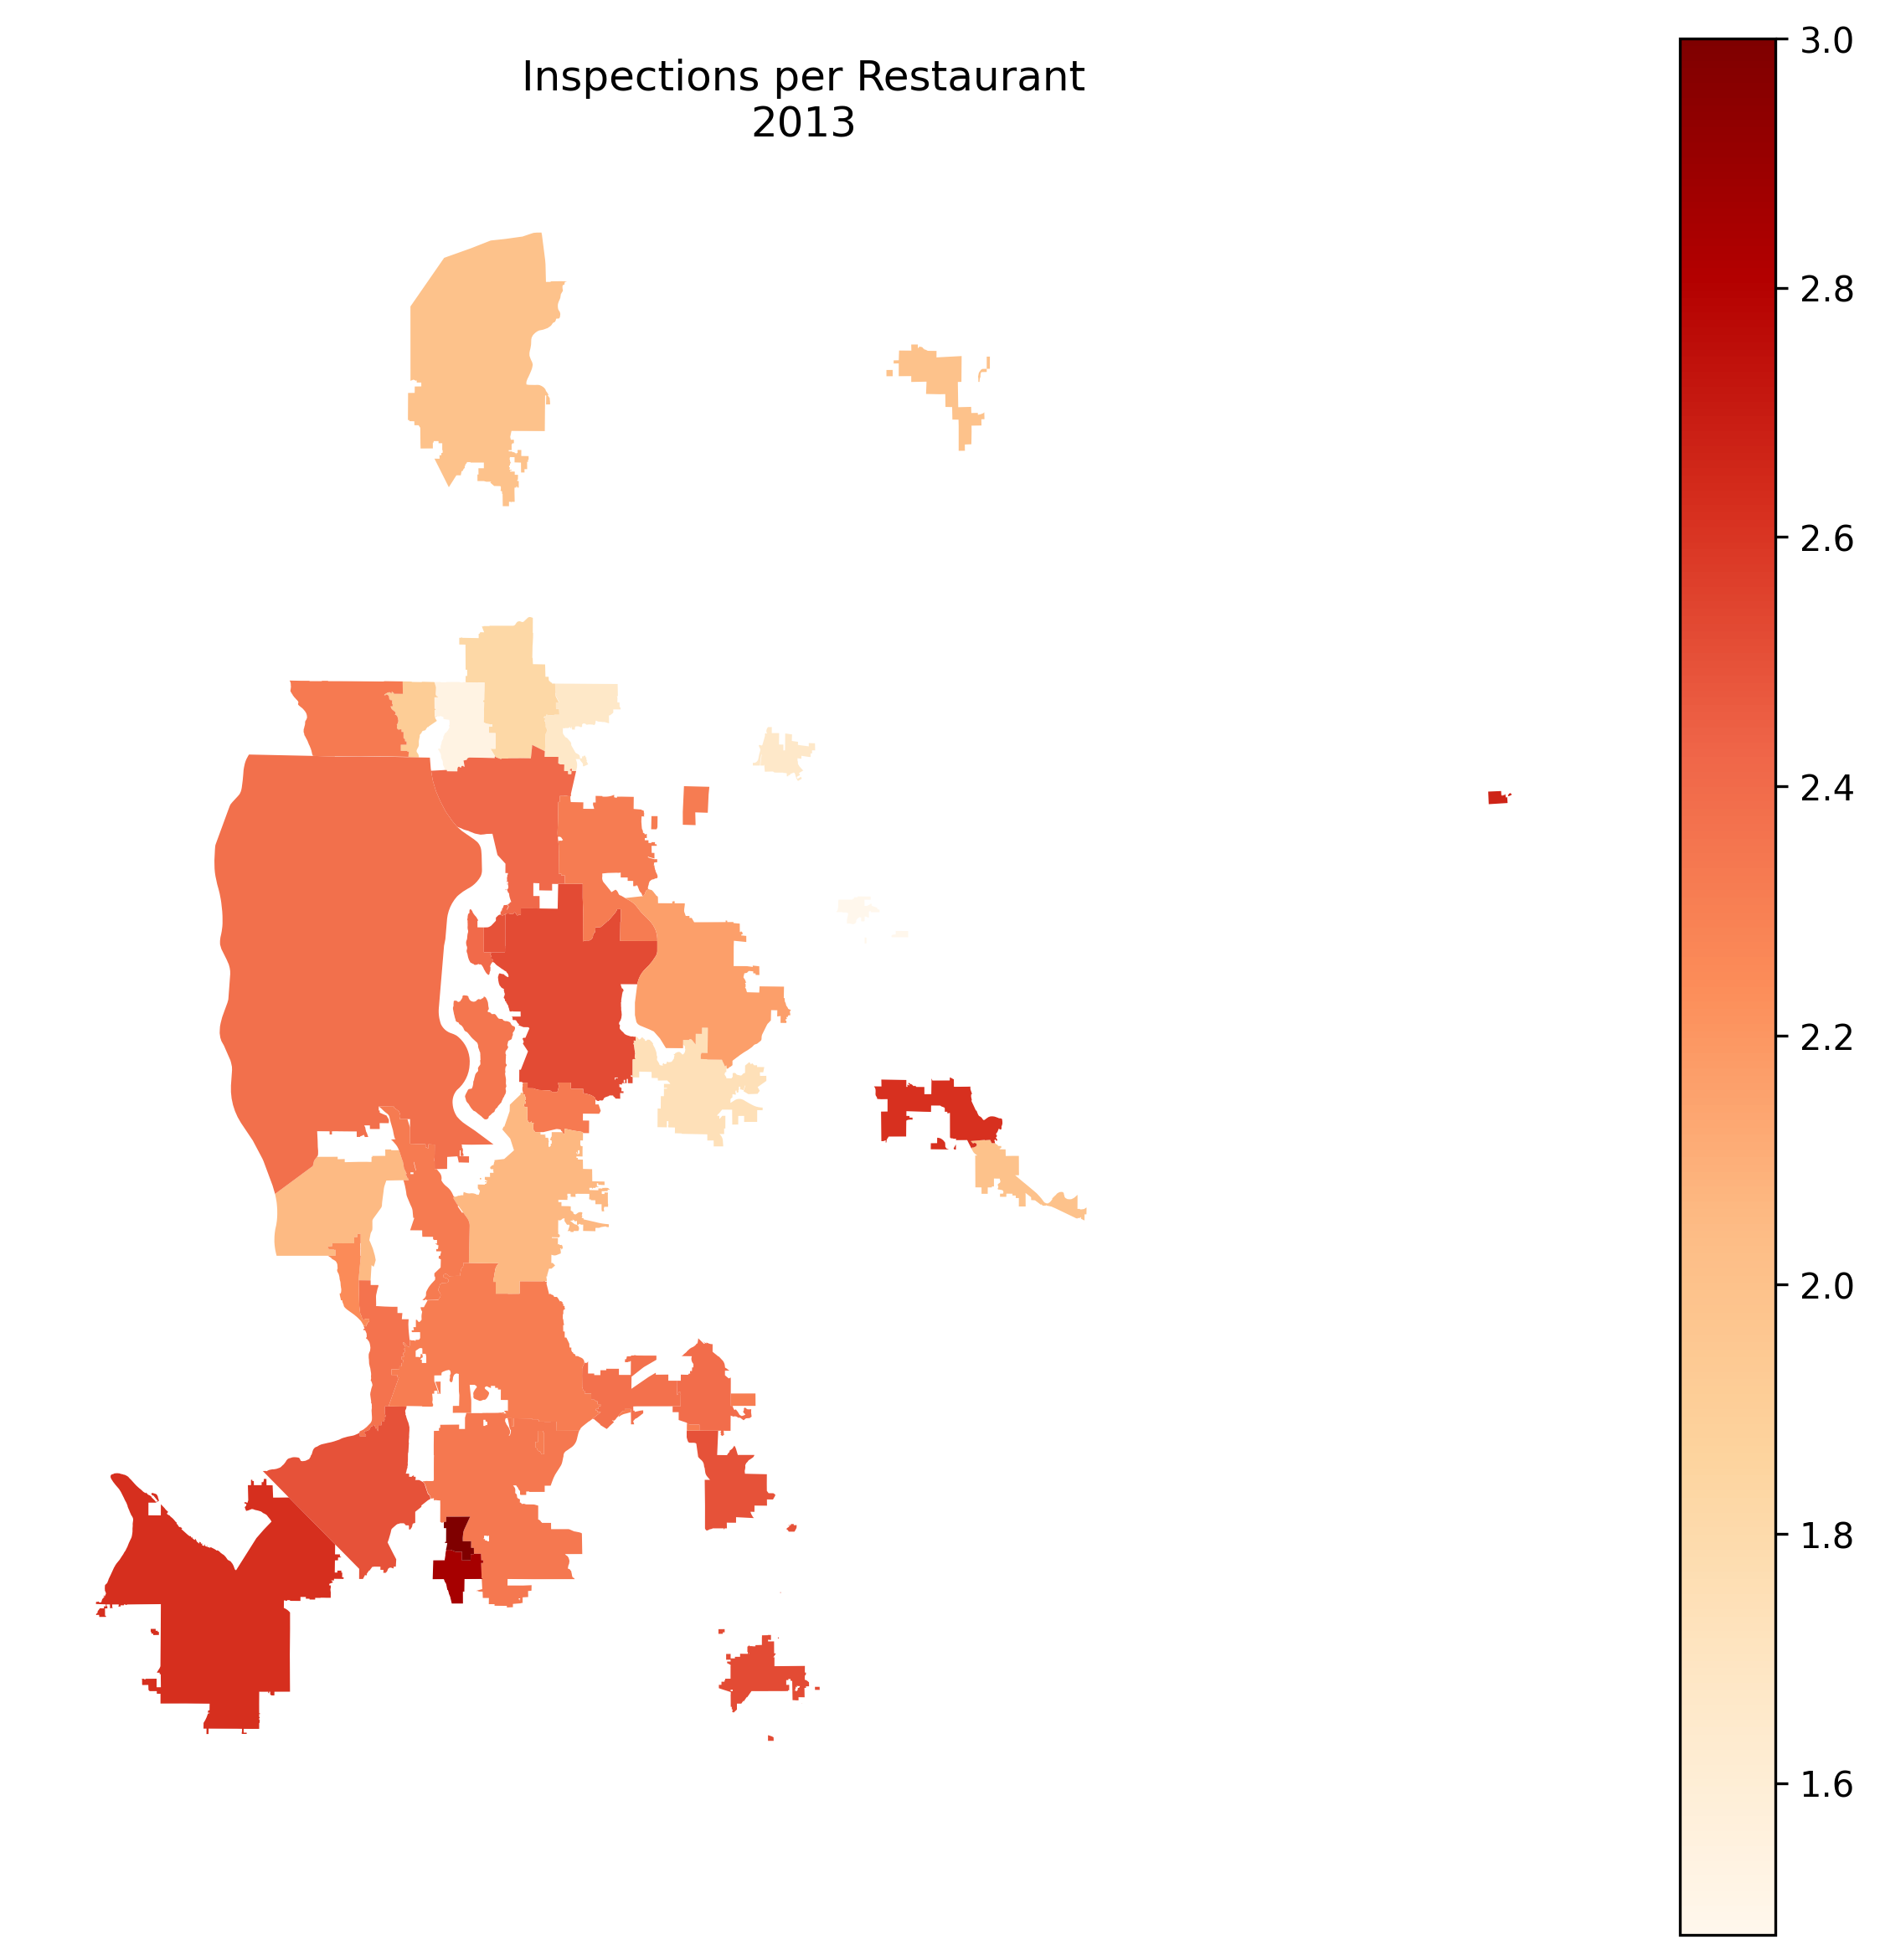

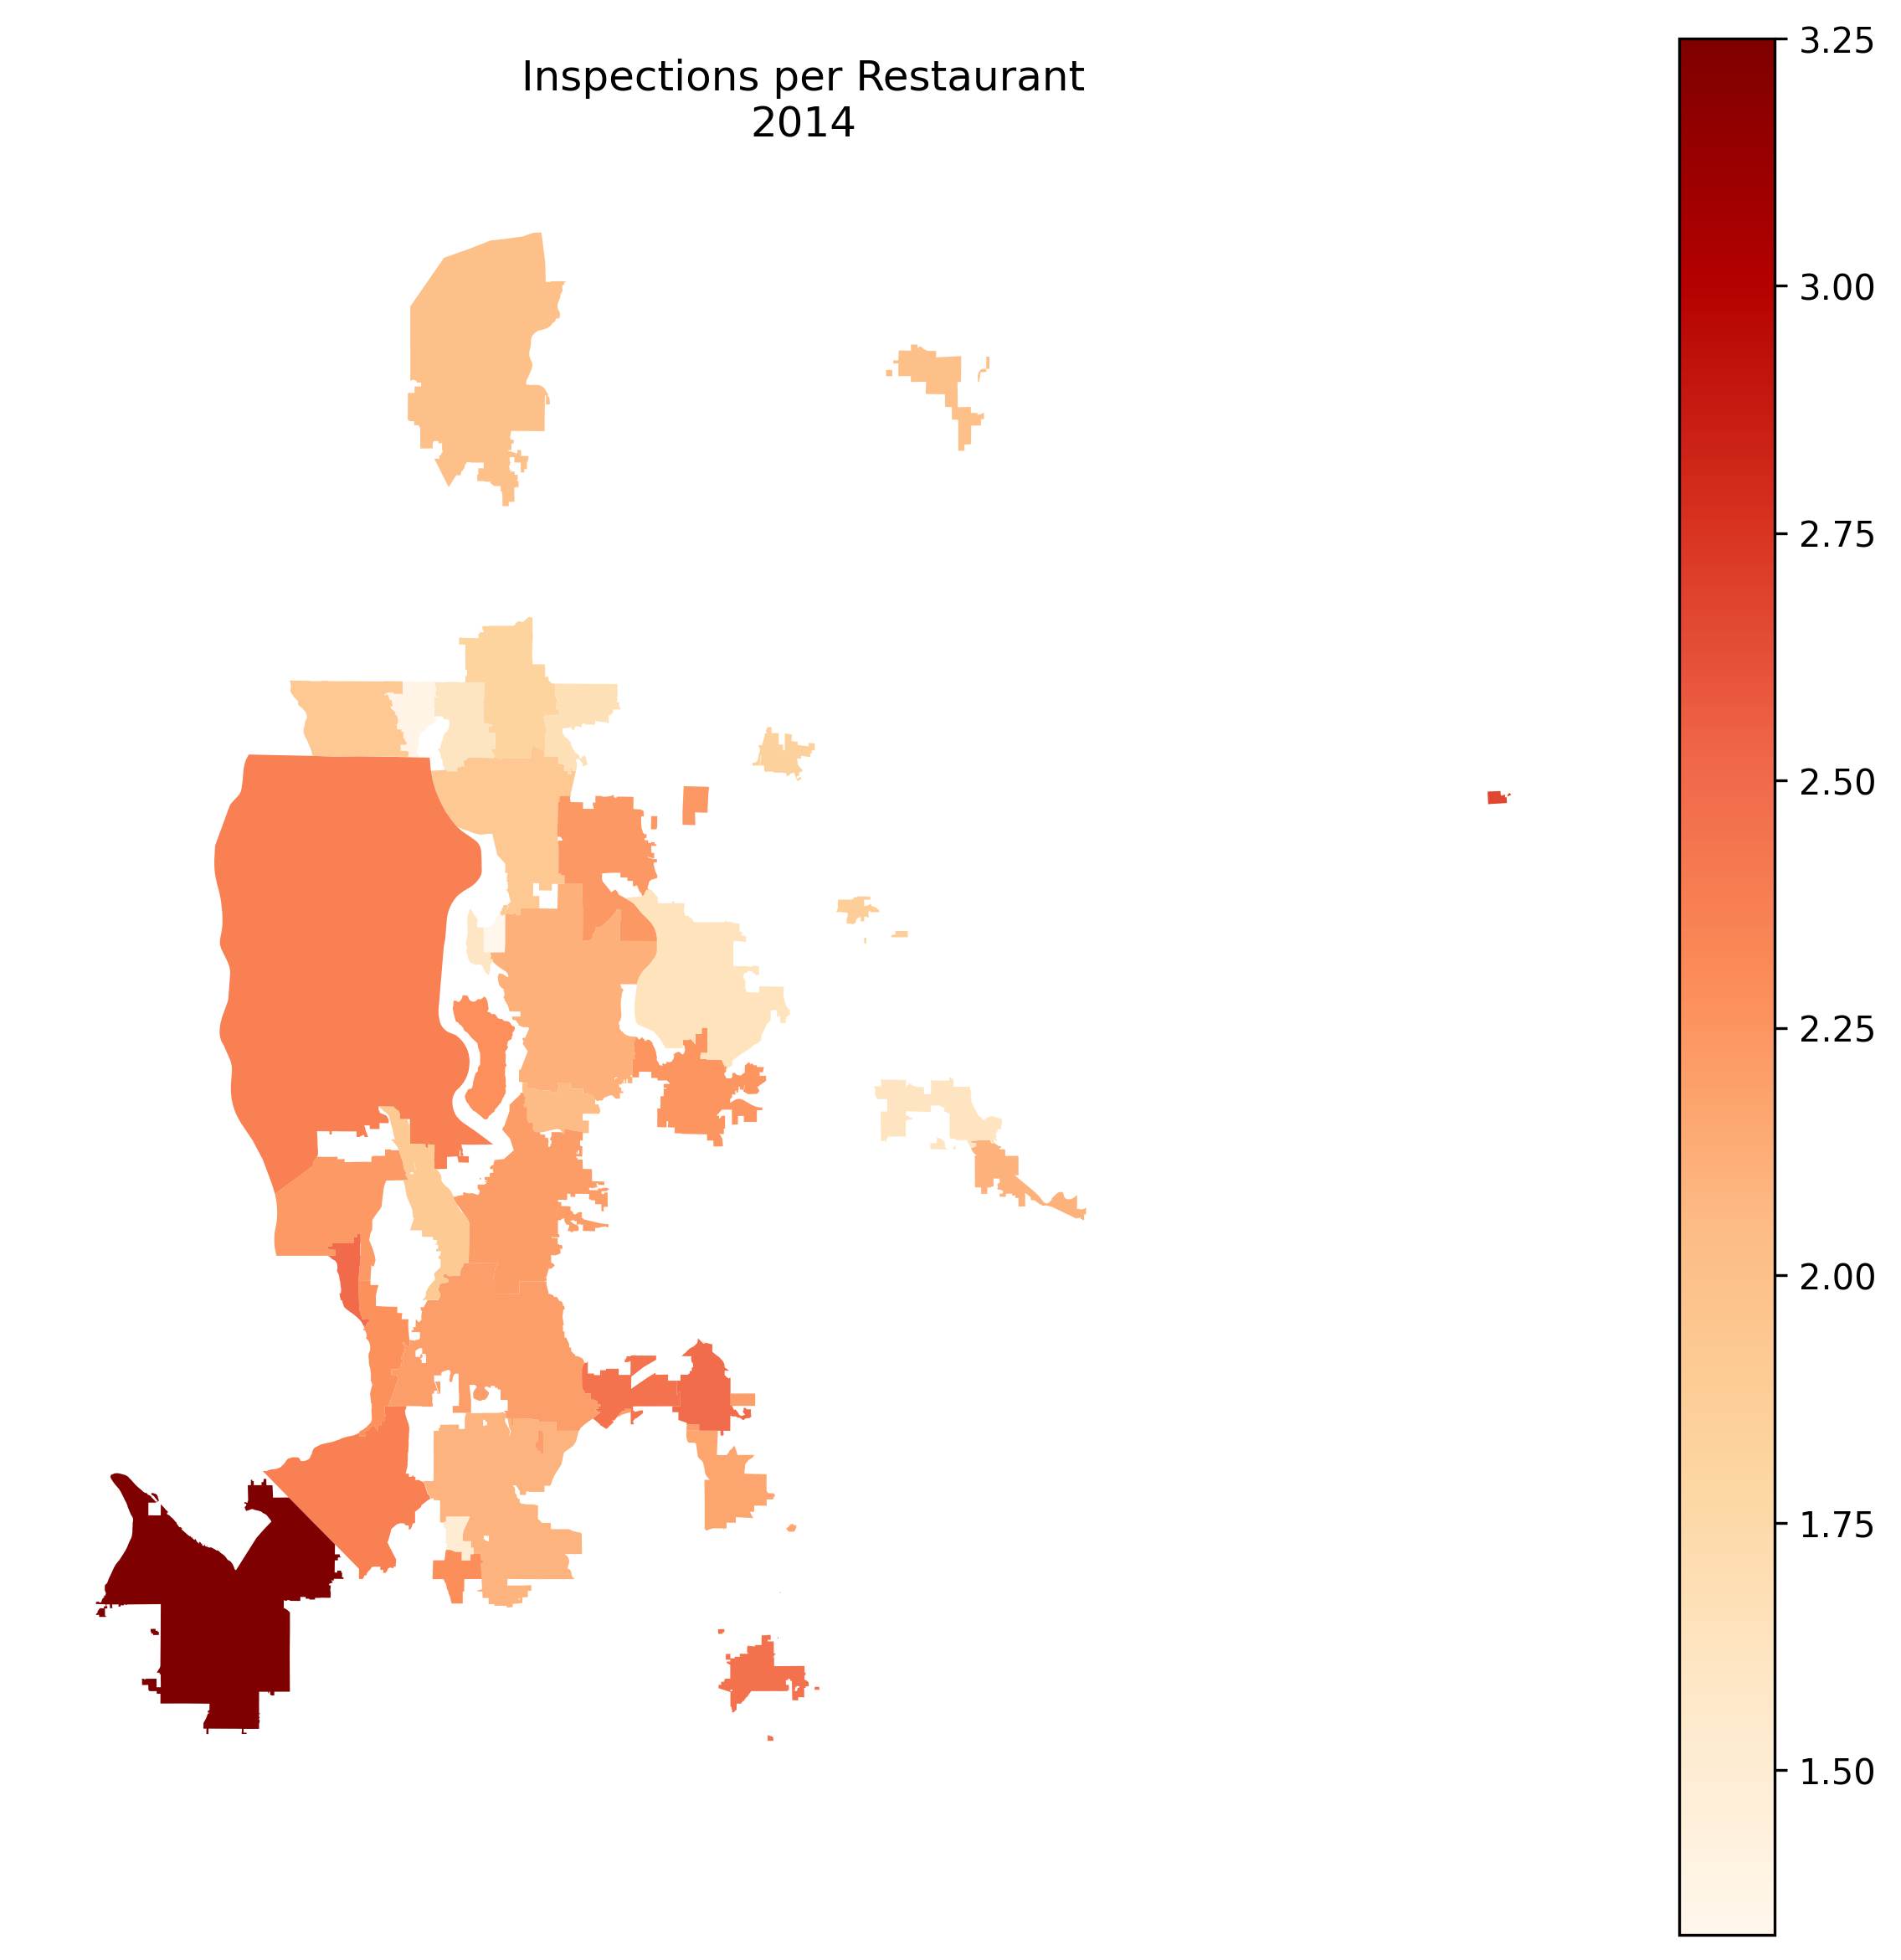

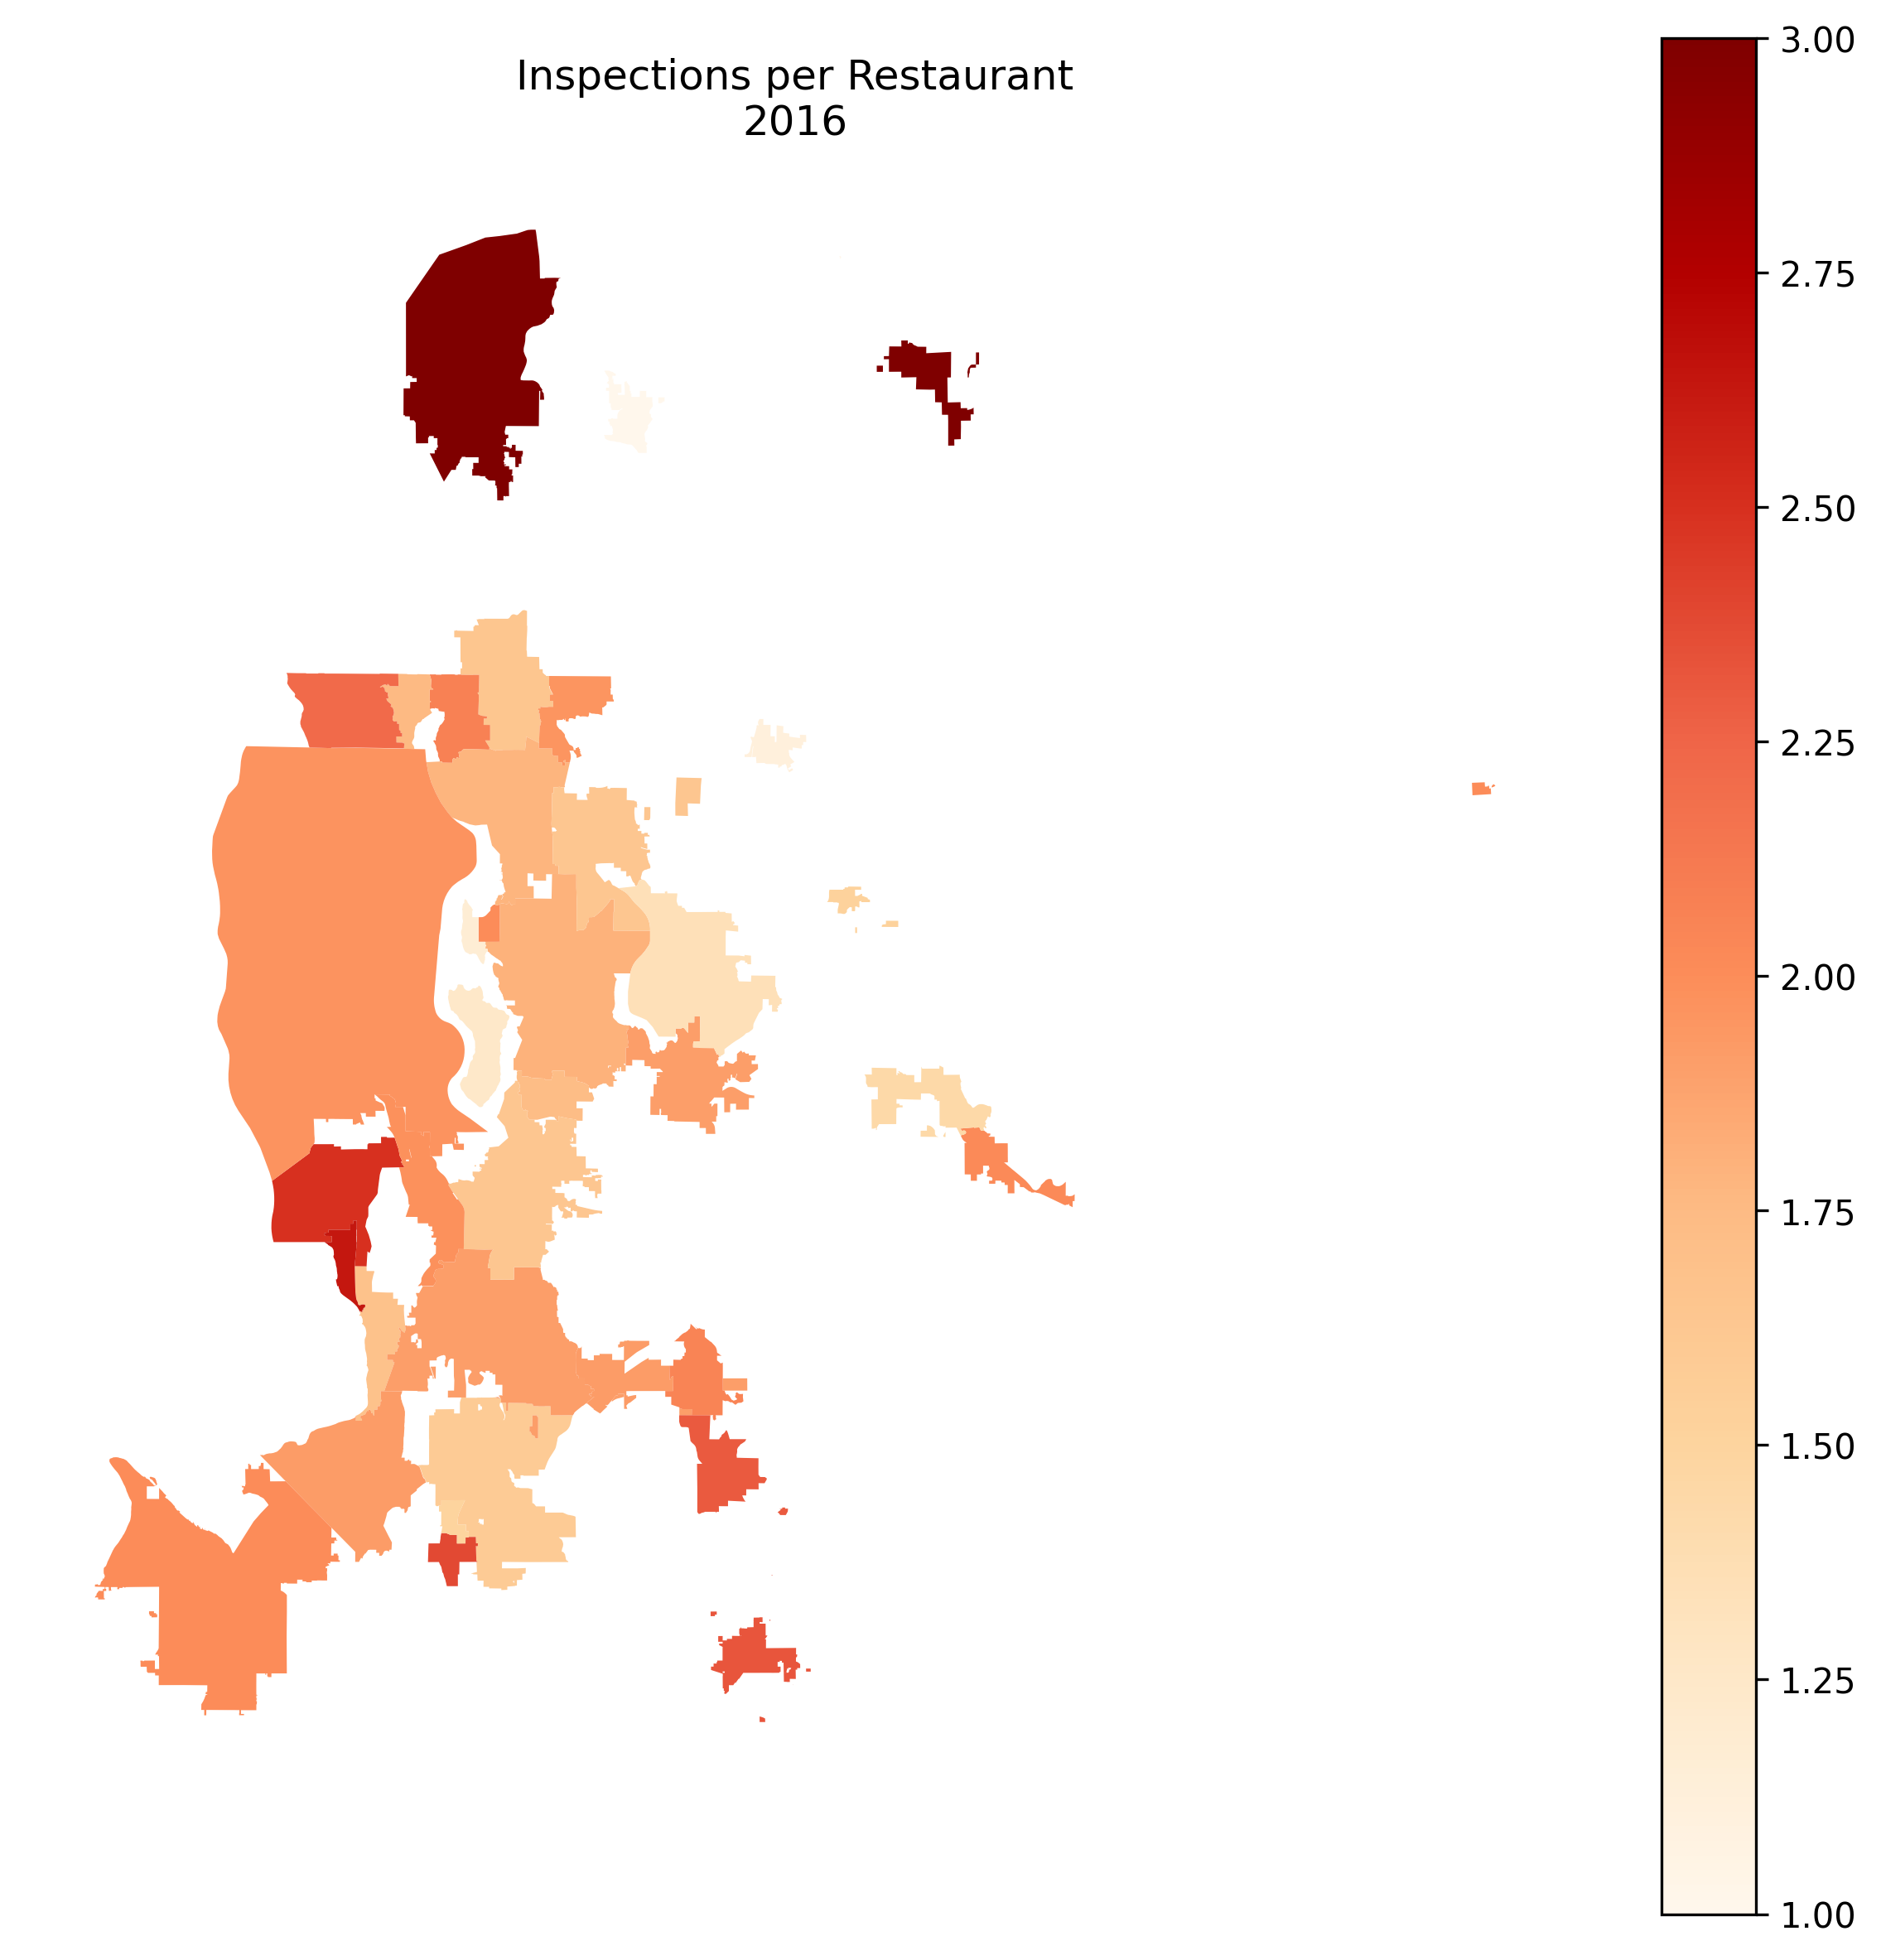

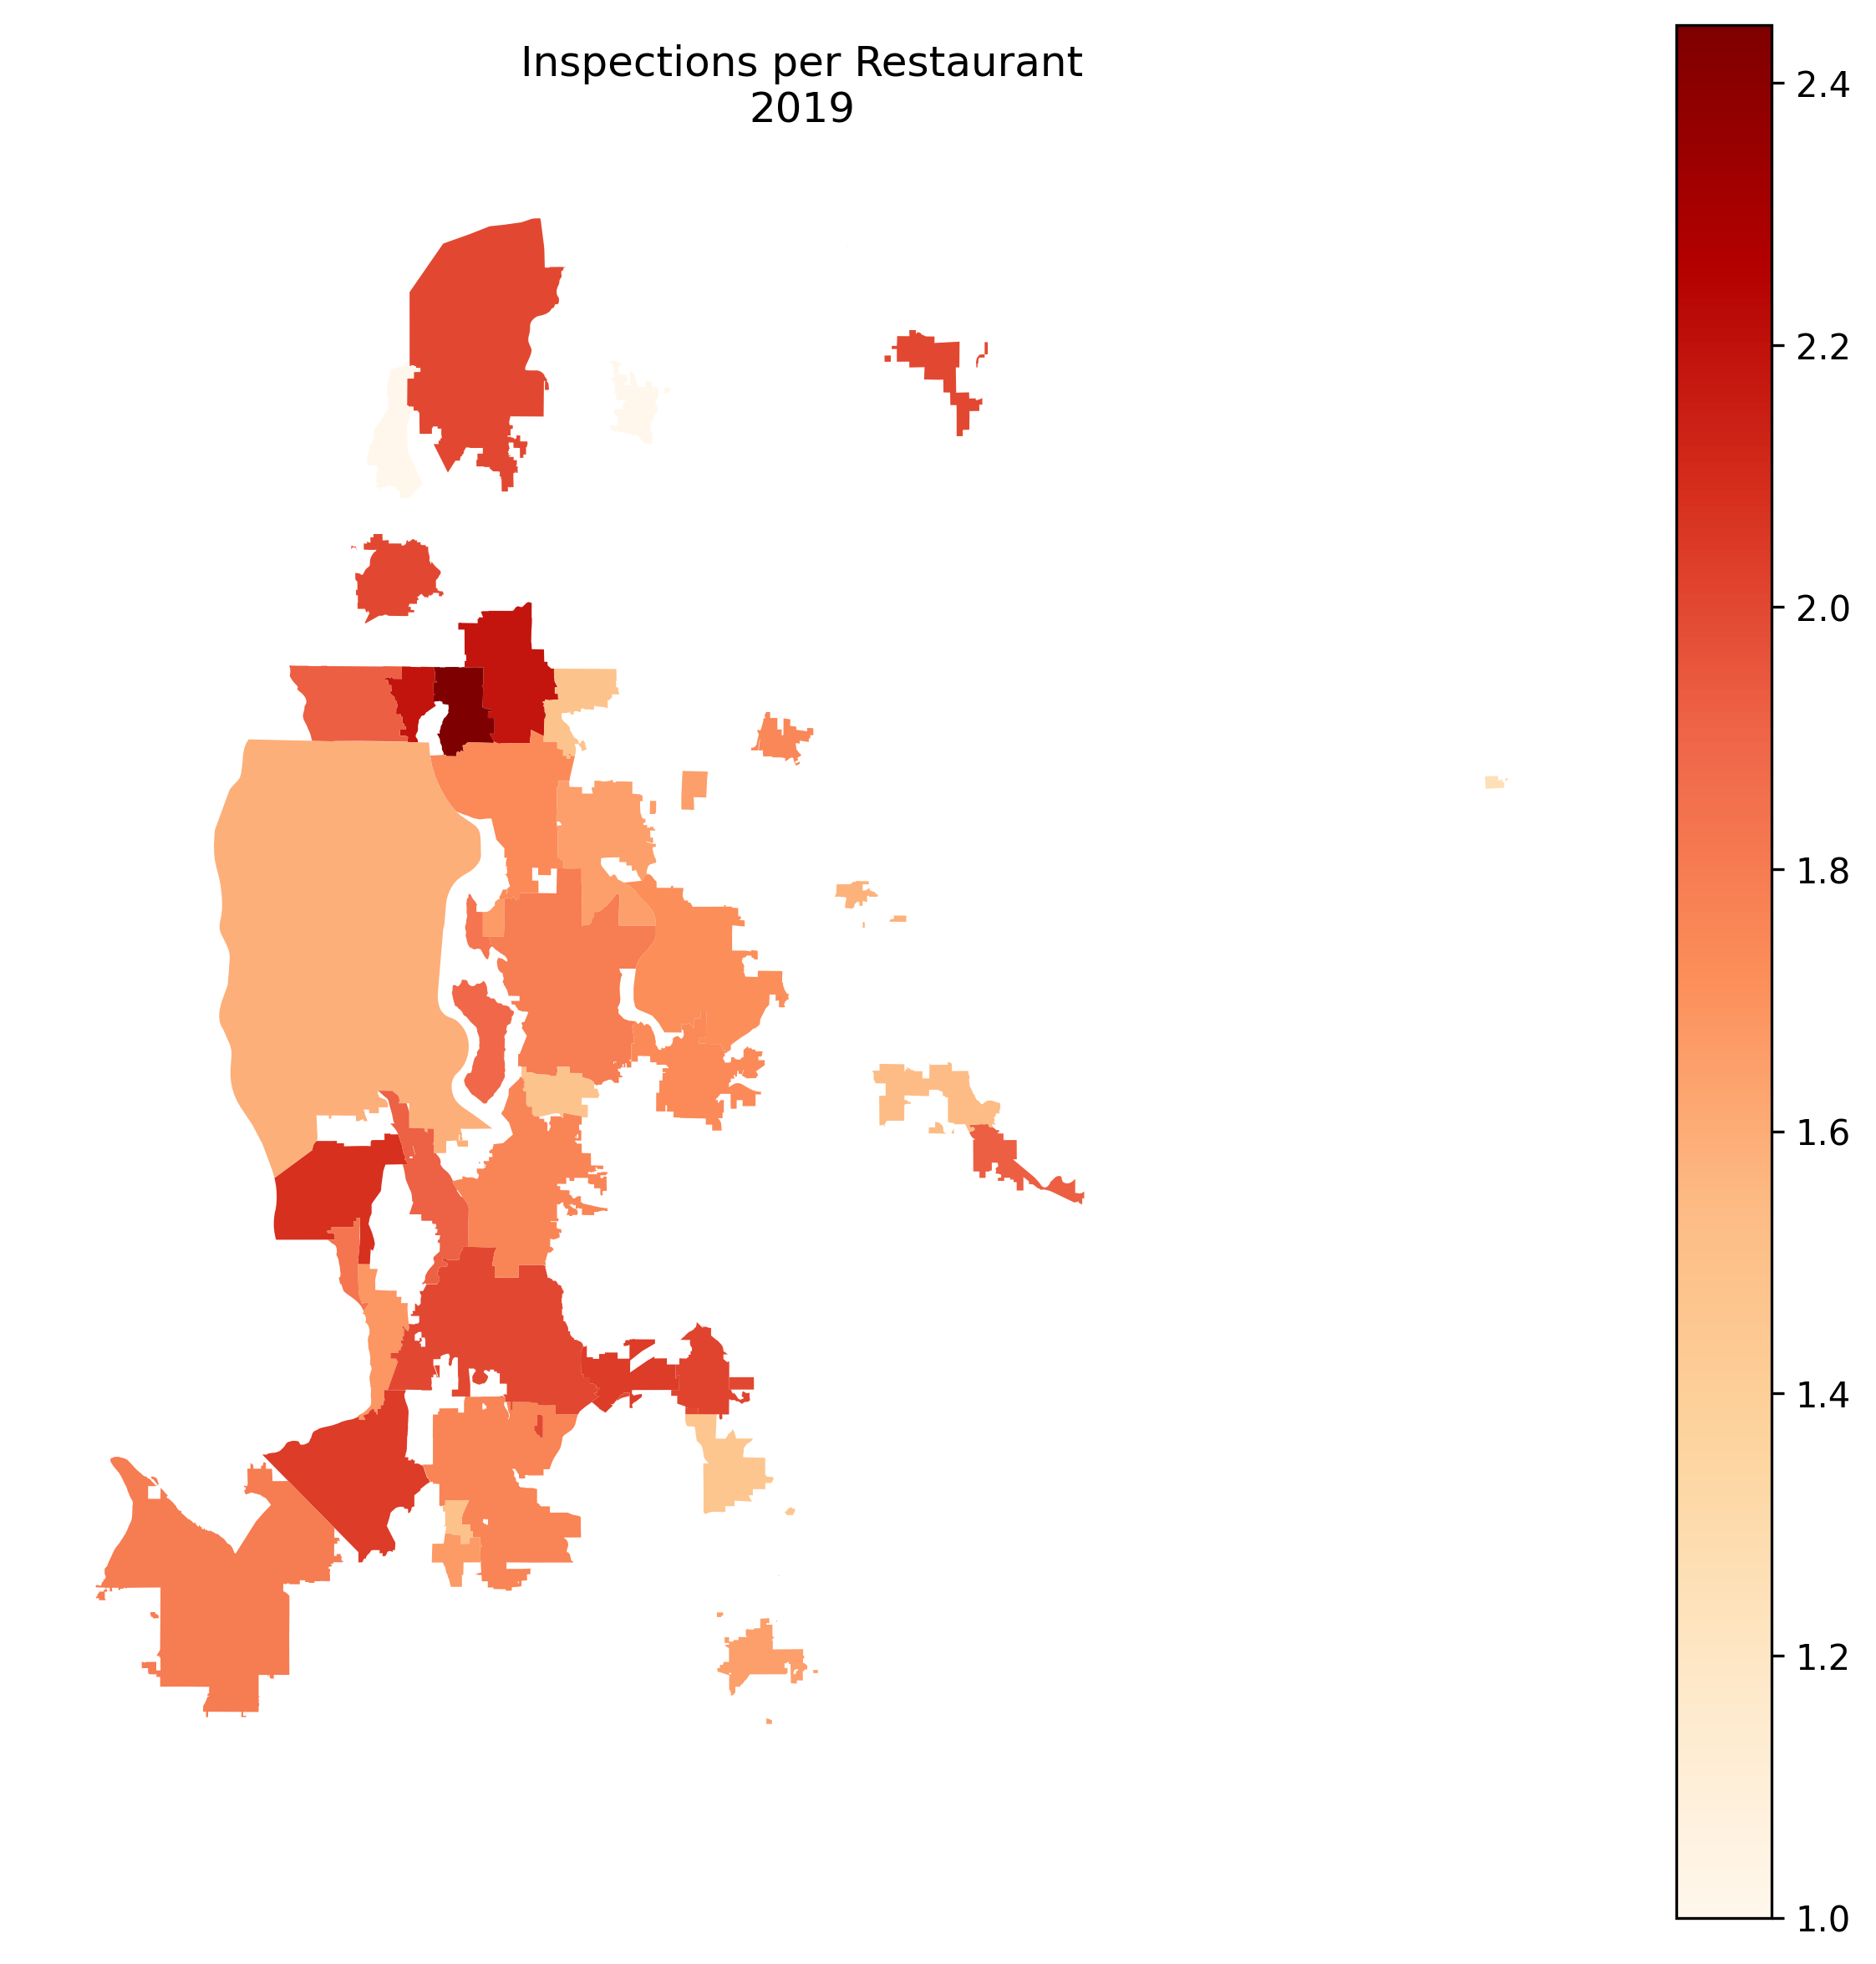

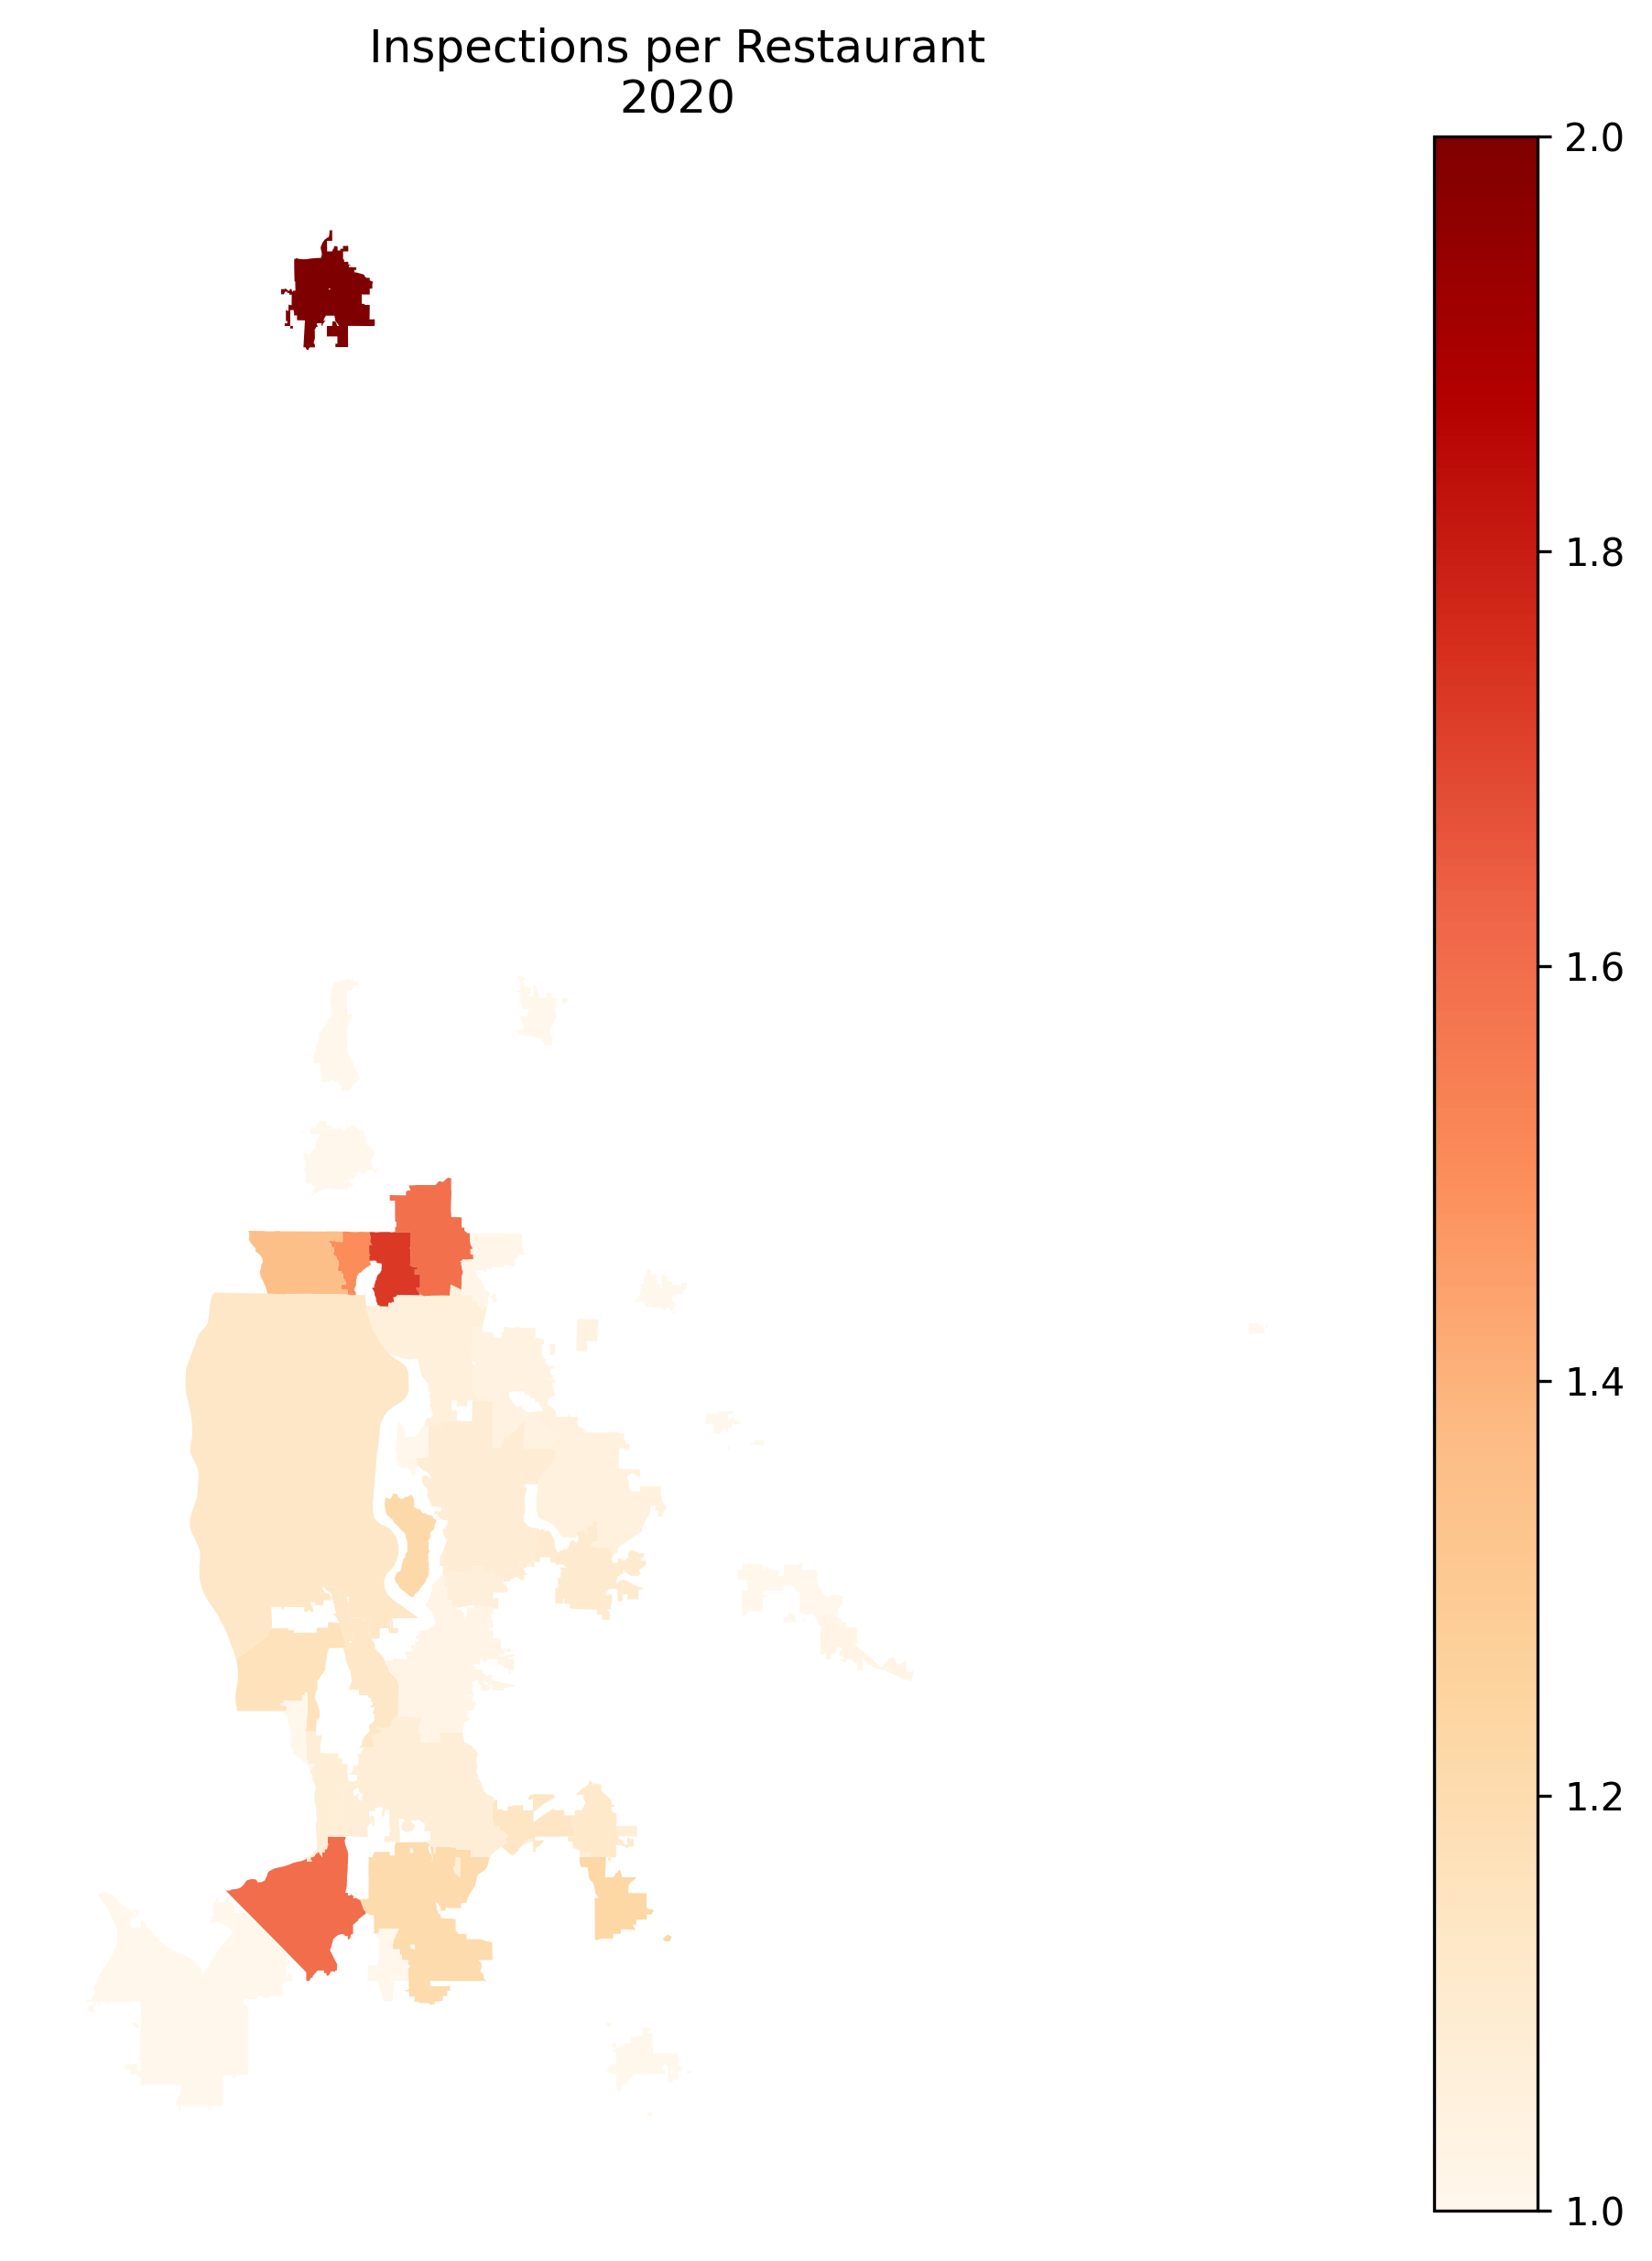

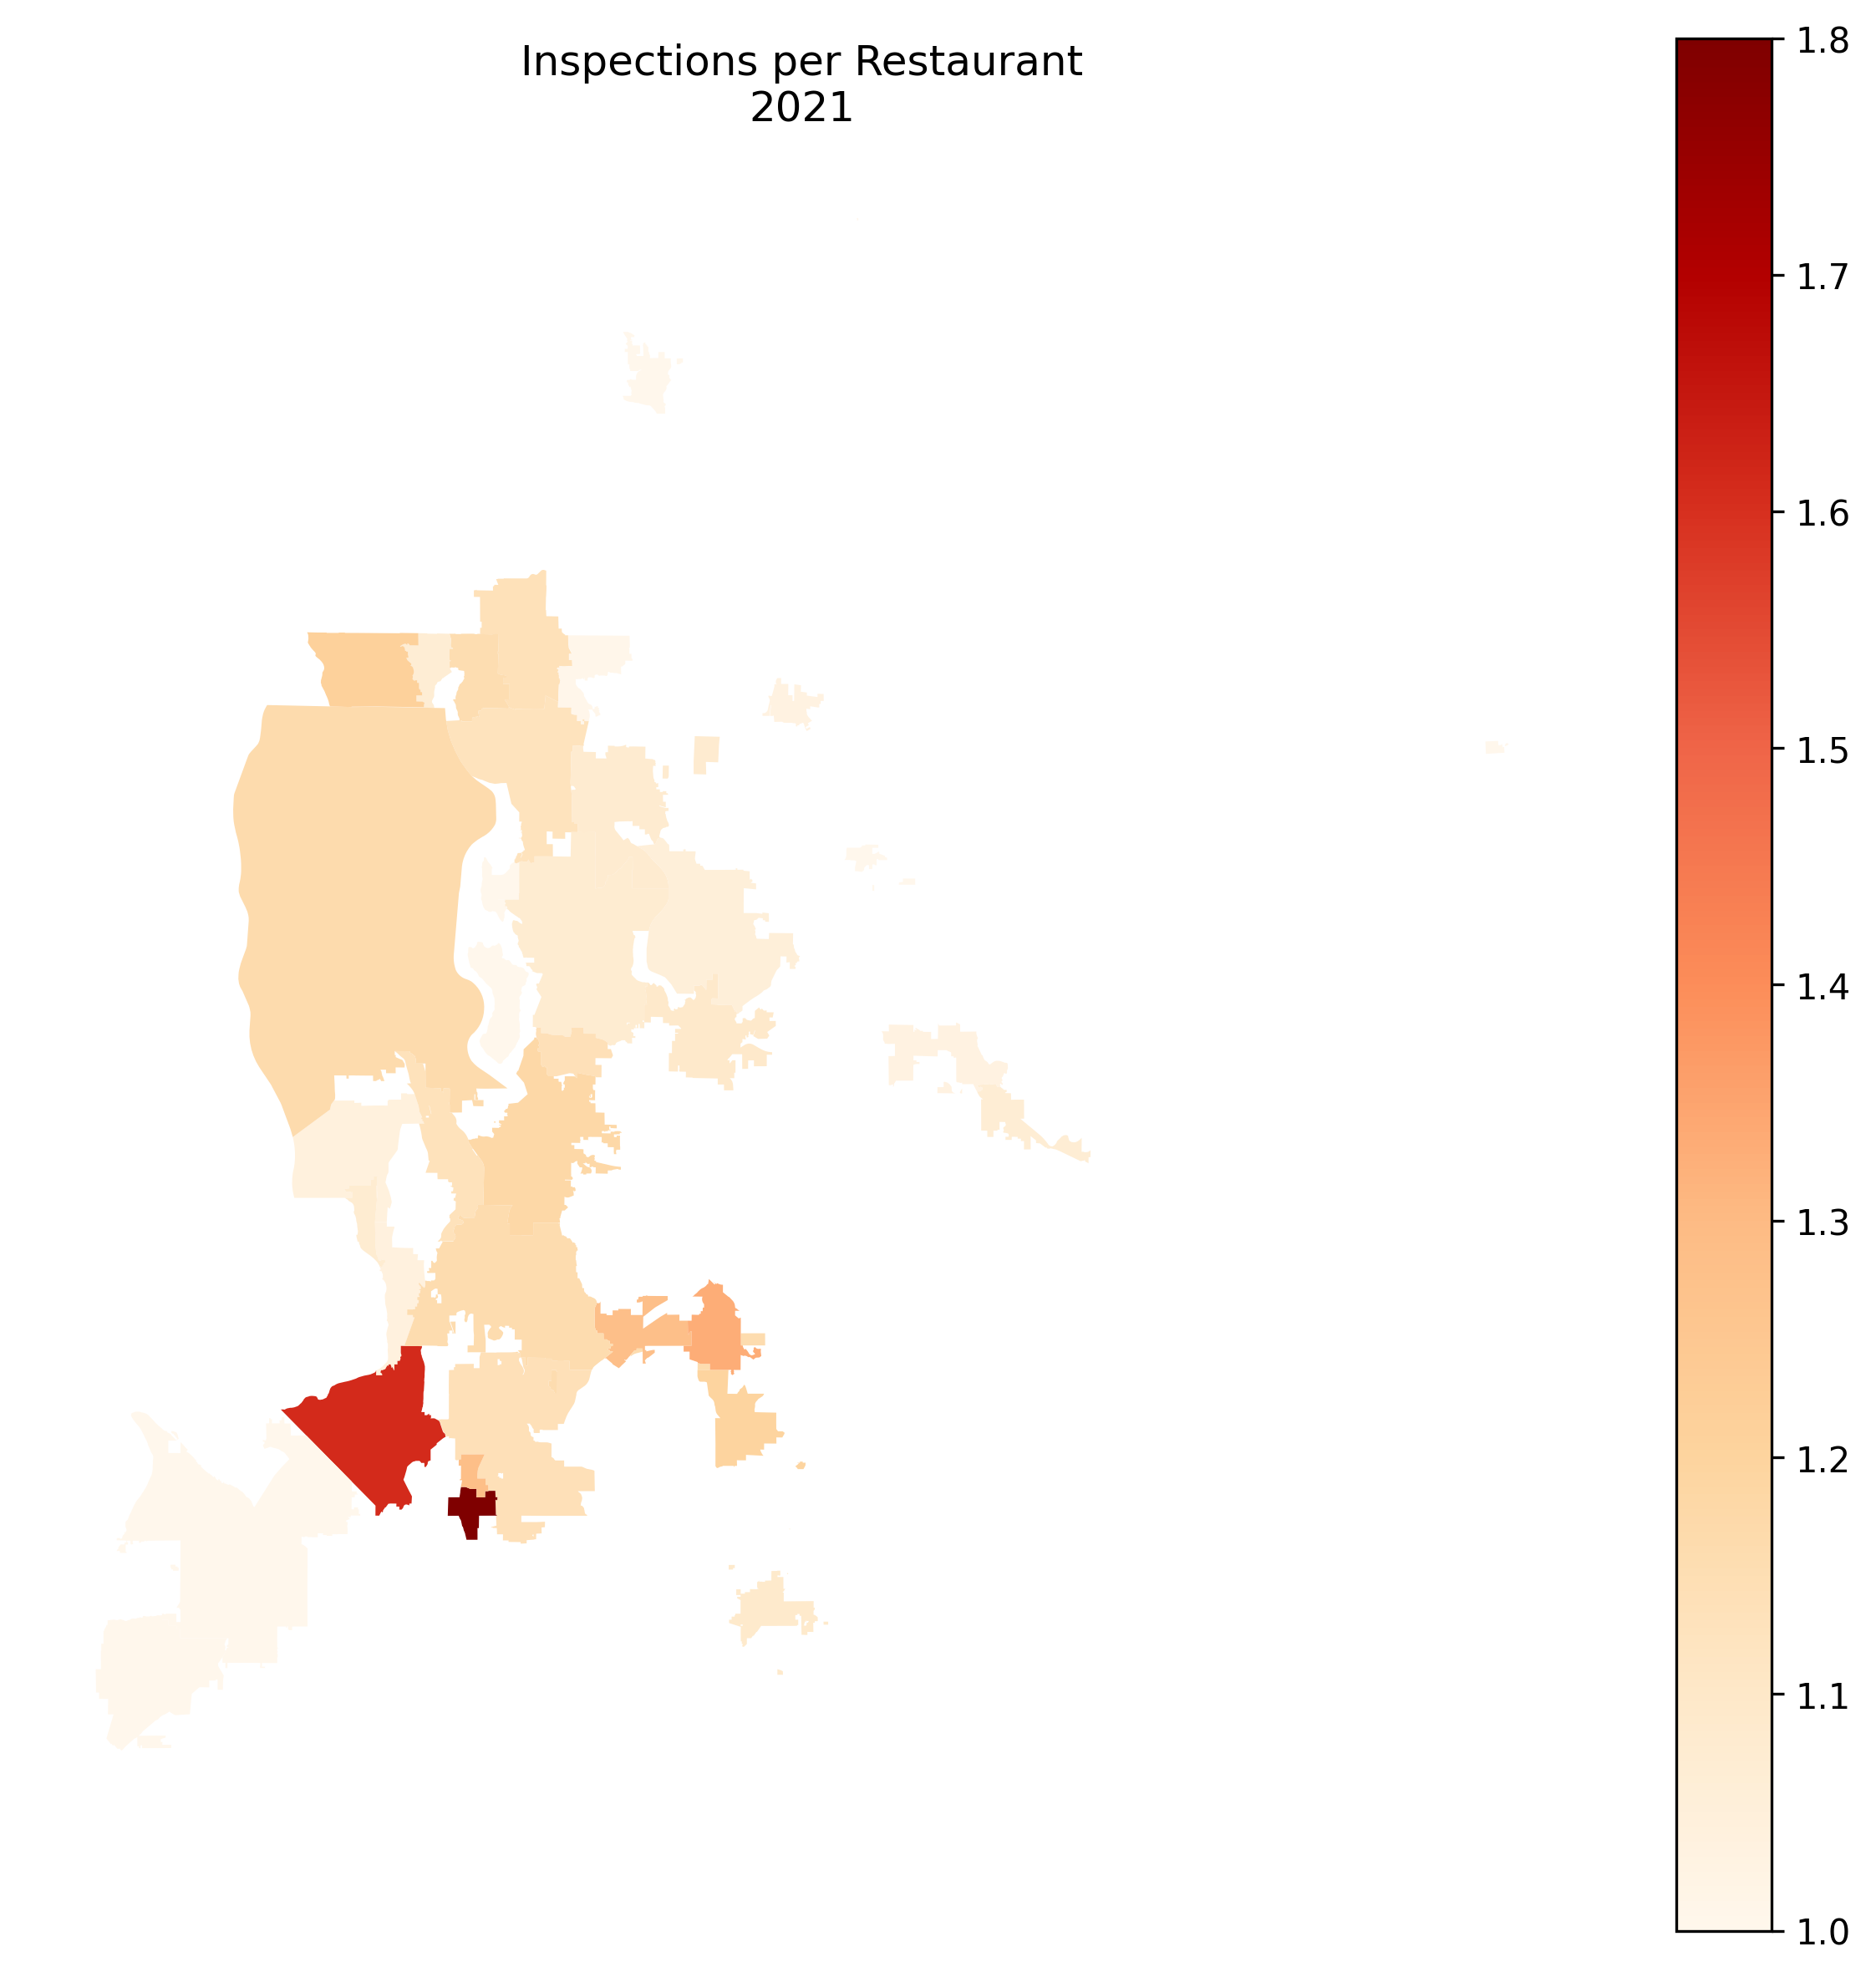

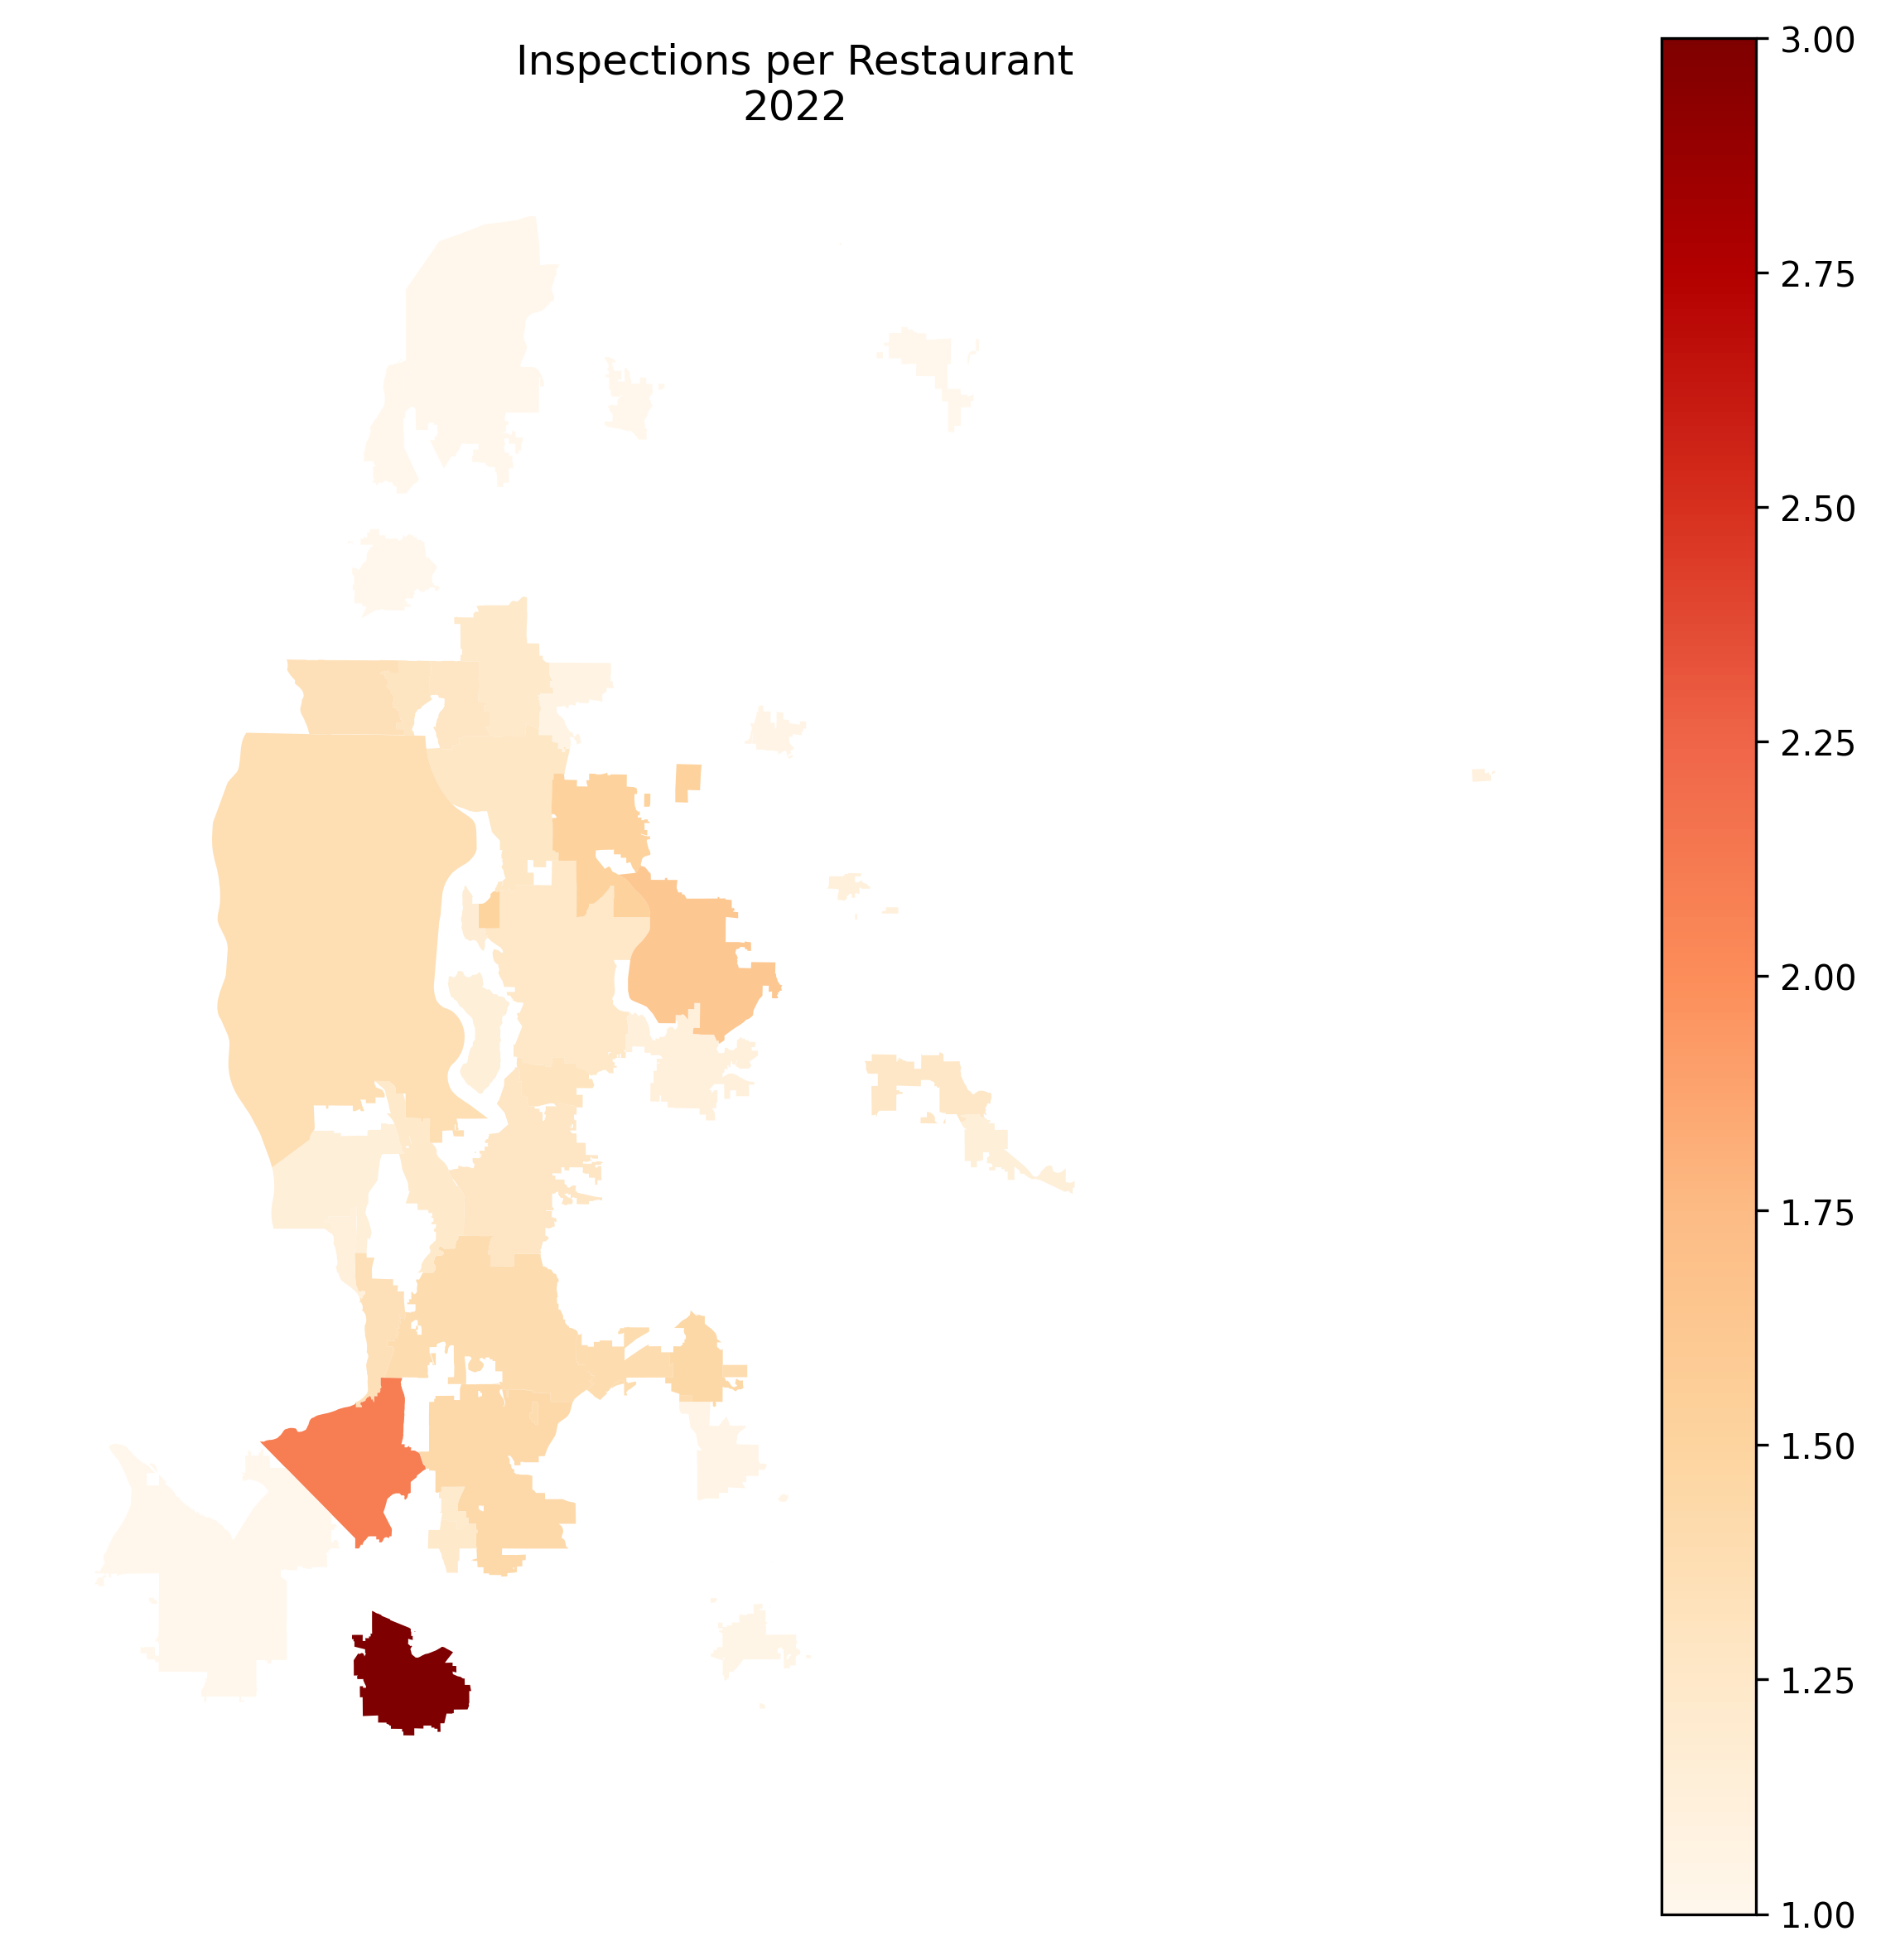

In [224]:
for year in range(2006, 2023):
    fig,ax = plt.subplots(1,1,figsize = (10,10),dpi = 300)
    geopandas.GeoDataFrame(temp3[temp3["year"]==year],geometry= "geometry").plot(column="proportion",legend=True, cmap='OrRd' ,label ="proportion" , ax = ax)
    # plt.axis("off")
    # plt.legend()
    # ax.set
    # plt.savefig("")
    ax.set_axis_off()
    # ax.legend(title = "Proportion")
#     ax.legend(fontsize=20,
          
#           loc=(1, .1),
#           title="LEGEND")

    ax.set_title(f"Inspections per Restaurant\n{year}")
    plt.savefig(f"IPR_{year}.jpeg" , bbox_inches = "tight")
    plt.show()

In [204]:
temp3[temp3["year"]==year]

year              City  Business_ID  Inspection_Serial_Num  proportion  \
0    2006            Auburn          105                    251    2.390476   
17   2006          Bellevue          174                    423    2.431034   
34   2006     Black Diamond            4                      7    1.750000   
51   2006           Bothell           33                     68    2.060606   
68   2006            Burien           37                     85    2.297297   
85   2006         Carnation           16                     27    1.687500   
102  2006        Clyde Hill            2                      5    2.500000   
119  2006         Covington           28                     62    2.214286   
136  2006        Des Moines           27                     68    2.518519   
153  2006            Duvall           15                     34    2.266667   
170  2006          Enumclaw           41                     98    2.390244   
187  2006           Everett            1                      2    2.000000   
201  2006       Federal Way          131                    315    2.404580   
218  2006          Issaquah           76                    180    2.368421   
235  2006           Kenmore           21                     46    2.190476   
252  2006              Kent          145                    349    2.406897   
269  2006          Kirkland           99                    219    2.212121   
286  2006  Lake Forest Park            8                     18    2.250000   
303  2006      Maple Valley           33                     79    2.393939   
320  2006            Medina            4                      7    1.750000   
337  2006     Mercer Island           29                     60    2.068966   
354  2006         Newcastle           18                     43    2.388889   
371  2006     Normandy Park            2                      2    1.000000   
388  2006        North Bend           24                     55    2.291667   
405  2006           Pacific            4                     10    2.500000   
422  2006           Redmond          139                    311    2.237410   
439  2006            Renton          133                    329    2.473684   
456  2006         Sammamish           39                     94    2.410256   
473  2006           Seattle         1271                   3196    2.514555   
490  2006         Shoreline           62                    144    2.322581   
507  2006         Skykomish            2                      6    3.000000   
524  2006        Snoqualmie            9                     21    2.333333   
541  2006            Tacoma            8                     15    1.875000   
558  2006           Tukwila           42                    103    2.452381   
575  2006       Woodinville           36                     81    2.250000   

     OBJECTID          CityName CountySeat  CityGNISPl  LastUpdate CountyFIPS  \
0        9118            Auburn         no     2409755  2016-02-29      53033   
17       9164          Bellevue         no     2409821  2019-08-31      53033   
34       8897     Black Diamond         no     2409855  2006-02-28      53033   
51       8927           Bothell         no     2409882  2017-11-30      53033   
68       9132            Burien         no     2409940  2010-05-31      53033   
85       8901         Carnation         no     2409989  2020-02-29      53033   
102      9146        Clyde Hill         no     2409492        None      53033   
119      8938         Covington         no     2410253  2016-02-29      53033   
136      9149        Des Moines         no     2410327        None      53033   
153      9018            Duvall         no     2410377  2014-08-31      53033   
170      9153          Enumclaw         no     2410448  2021-08-31      53033   
187      8936           Everett        yes     2410469  2021-08-31      53061   
201      9094       Federal Way         no     2410494  2021-05-31      53033   
218      8979          Iss

In [205]:
geopandas.GeoDataFrame(temp3[temp3["year"]==year],geometry= "geometry")

year              City  Business_ID  Inspection_Serial_Num  proportion  \
0    2006            Auburn          105                    251    2.390476   
17   2006          Bellevue          174                    423    2.431034   
34   2006     Black Diamond            4                      7    1.750000   
51   2006           Bothell           33                     68    2.060606   
68   2006            Burien           37                     85    2.297297   
85   2006         Carnation           16                     27    1.687500   
102  2006        Clyde Hill            2                      5    2.500000   
119  2006         Covington           28                     62    2.214286   
136  2006        Des Moines           27                     68    2.518519   
153  2006            Duvall           15                     34    2.266667   
170  2006          Enumclaw           41                     98    2.390244   
187  2006           Everett            1                      2    2.000000   
201  2006       Federal Way          131                    315    2.404580   
218  2006          Issaquah           76                    180    2.368421   
235  2006           Kenmore           21                     46    2.190476   
252  2006              Kent          145                    349    2.406897   
269  2006          Kirkland           99                    219    2.212121   
286  2006  Lake Forest Park            8                     18    2.250000   
303  2006      Maple Valley           33                     79    2.393939   
320  2006            Medina            4                      7    1.750000   
337  2006     Mercer Island           29                     60    2.068966   
354  2006         Newcastle           18                     43    2.388889   
371  2006     Normandy Park            2                      2    1.000000   
388  2006        North Bend           24                     55    2.291667   
405  2006           Pacific            4                     10    2.500000   
422  2006           Redmond          139                    311    2.237410   
439  2006            Renton          133                    329    2.473684   
456  2006         Sammamish           39                     94    2.410256   
473  2006           Seattle         1271                   3196    2.514555   
490  2006         Shoreline           62                    144    2.322581   
507  2006         Skykomish            2                      6    3.000000   
524  2006        Snoqualmie            9                     21    2.333333   
541  2006            Tacoma            8                     15    1.875000   
558  2006           Tukwila           42                    103    2.452381   
575  2006       Woodinville           36                     81    2.250000   

     OBJECTID          CityName CountySeat  CityGNISPl  LastUpdate CountyFIPS  \
0        9118            Auburn         no     2409755  2016-02-29      53033   
17       9164          Bellevue         no     2409821  2019-08-31      53033   
34       8897     Black Diamond         no     2409855  2006-02-28      53033   
51       8927           Bothell         no     2409882  2017-11-30      53033   
68       9132            Burien         no     2409940  2010-05-31      53033   
85       8901         Carnation         no     2409989  2020-02-29      53033   
102      9146        Clyde Hill         no     2409492        None      53033   
119      8938         Covington         no     2410253  2016-02-29      53033   
136      9149        Des Moines         no     2410327        None      53033   
153      9018            Duvall         no     2410377  2014-08-31      53033   
170      9153          Enumclaw         no     2410448  2021-08-31      53033   
187      8936           Everett        yes     2410469  2021-08-31      53061   
201      9094       Federal Way         no     2410494  2021-05-31      53033   
218      8979          Iss

In [180]:
df_no_date.groupby(["City"]).mean()

Longitude   Latitude  Inspection Score  Violation Points  \
City                                                                          
Algona           -122.257554  47.323726         19.050955          4.171975   
Auburn           -122.223173  47.307292          9.068056          3.586163   
Baring           -121.486160  47.772580          0.000000          0.000000   
Bellevue         -122.169926  47.609420         19.809211          5.566952   
Black Diamond    -122.013931  47.316664          3.631902          1.947853   
Bothell          -122.199019  47.756430         14.660008          4.537383   
Burien           -122.337924  47.473177         11.531056          3.741460   
Carnation        -121.912900  47.652079          6.016340          2.814029   
Clyde Hill       -122.212037  47.627028          5.709091          2.818182   
Covington        -122.112608  47.359138          9.858438          3.166247   
Des Moines       -122.310740  47.395694         11.892442          4.105620   
Duvall           -121.984255  47.734777         16.705660          4.325472   
Enumclaw         -121.990730  47.203672          7.954168          2.819729   
Everett          -122.224237  47.908257          3.965517          2.586207   
Fall City        -121.891403  47.567653         14.174935          4.407311   
Federal Way      -122.324697  47.310067         11.582678          3.991227   
Hobart           -121.972660  47.419970          0.833333          0.833333   
Issaquah         -122.039692  47.544334         13.631743          4.453211   
Kenmore          -122.247747  47.754838         22.302313          5.587004   
Kent             -122.218451  47.390018         13.043798          3.995330   
Kirkland         -122.194226  47.695561         16.008858          5.182077   
Lake Forest Park -122.283633  47.753760         10.817771          3.668675   
Lakewood                 NaN        NaN          8.000000          4.000000   
Lynnwood         -122.280067  47.754216          6.000000          3.000000   
Maple Valley     -122.030221  47.372974          5.999542          2.496334   
Medina           -122.232873  47.621404         12.036364          5.072727   
Mercer Island    -122.230289  47.572618          8.517483          3.351748   
Mount Vernon     -122.410578  48.415296          0.000000          0.000000   
Mukilteo         -122.300646  47.913736          0.000000          0.000000   
Newcastle        -122.166593  47.539136         10.890766          3.519144   
Normandy Park    -122.331537  47.432194         14.057895          3.952632   
North Bend       -121.776890  47.488860         10.770450          3.634750   
Pacific          -122.249992  47.269969          5.105442          2.955782   
Preston          -121.936805  47.525917          8.987342          4.341772   
Puyallup         -122.362760  47.551650          0.000000          0.000000   
Ravensdale       -121.954204  47.353413          2.492063          1.603175   
Redmond          -122.114704  47.667957         17.170631          4.752094   
Renton           -122.189137  47.479450         13.907230          4.163802   
Sammamish        -122.029463  47.602626         12.346847          3.959910   
Sea Tac          -122.296723  47.440875         15.261373          4.879239   
Seatac           -122.290625  47.448082          8.926287          3.627260   
Seattle          -122.330963  47.615703         14.734056          4.589255   
Shoreline        -122.333453  47.751057         13.362518          4.078975   
Skykomish        -121.315643  47.715504          4.097222          2.131944   
Snohomish        -122.087743  47.905943          0.000000          0.000000   
Snoqualmie       -121.841184  47.527566          9.578205          3.794872   
Snoqualmie Pass  -121.418679  47.430112          4.919355          1.655914   
Tacoma           -122.347333  47.235342          1.174497          0.771812   
Tukwila          -122.265241  47.463241         10.741034          3.